# Clouds Analysis of Isolated cells




### Dec 2020, JAH

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

to_df = pd.DataFrame.from_records

from invisible_cities.reco import corrections as cof

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.hfit         as hfit

import bes.bes           as bes
import bes.pltbes        as pltbes

import bes.chits         as chits
import bes.display       as nplay

import clouds        as clouds
import pltclouds     as pltclouds

import bes.cloudsdia as cloudsdia

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed Dec 16 11:38:10 2020


### Event

In [5]:
runs      = [8182,]
sample    = 'ds'
dfhits, dfhitHTs, dmaps = cloudsdia.load_data(runs, sample)
dfhits   = dfhits[0]
dfhitHTs = dfhitHTs[0]
dmaps    = dmaps[0]
corrfac  = cloudsdia.get_corrfac(dmaps)

['/home/hernando/data/NEW/chits_ds_rough_8182.h5']
drift velocity  0.9248098826413511


In [6]:
events  = np.unique(dfhits.event.values)
ievent   = np.random.choice(events, 1)[0]
print('event number ', ievent)
evt    = dfhits.groupby('event').get_group(ievent)
print('total energy {:6.3f}'.format(np.sum(evt.Ec)), 'MeV')
dz     = np.max(evt.Z) - np.min(evt.Z)
print('z-width {:6.3f}'.format(dz), 'mm')

event number  1832866
total energy  1.679 MeV
z-width 45.779 mm


## Run

In [8]:
#run     = True
#ntotal  = 10000
#runs    = [8182, 8183, 8184]
#runs    = [8182,]
#range_e = (1.55, 1.75)
#if (run):
#    ok  = input('Do you want to run (y) ? ')
#    if (ok == 'y'): 
#        df, dfiso  = cloudsdia.cloudsdia(runs, ntotal = ntotal)
#        sel     = ut.in_range(df.evt_ecells, range_e)
#        df      = df[sel]
#        print('size ', len(df))
        #df   .to_hdf('clouds_summary_ds_141220.h5'    , key='df', mode='w')
        #dfiso.to_hdf('clouds_summary_ds_iso_141220.h5', key='df', mode='w')

Do you want to run (y) ?  no


## Load Data

In [9]:
df     = pd.read_hdf('./clouds_summary_ds_141220.h5'    , key = 'df')
dfiso  = pd.read_hdf('./clouds_summary_ds_iso_141220.h5', key = 'df')

### Inspect data

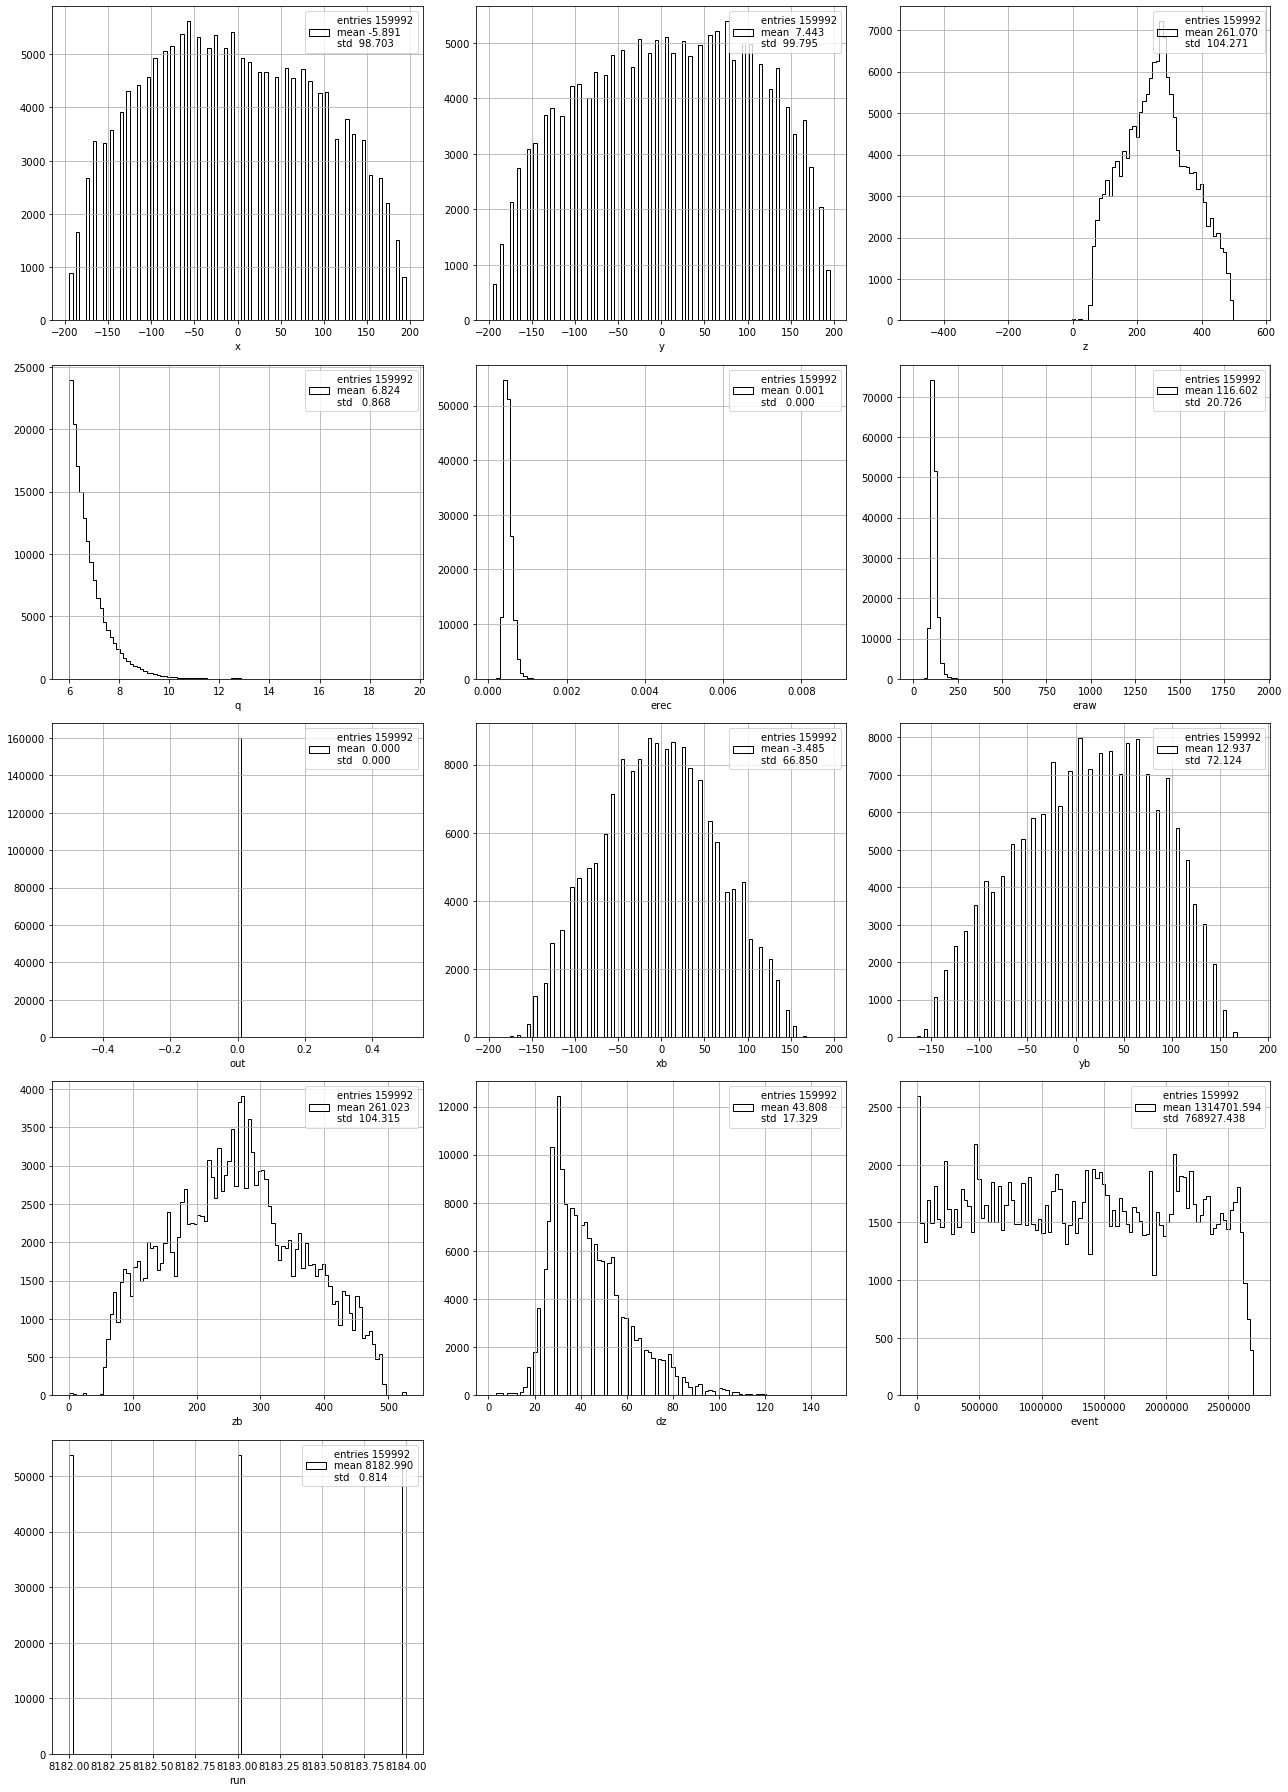

In [10]:
pltext.df_inspect(dfiso, ncolumns = 3)

# Isolated cells 

## Positions

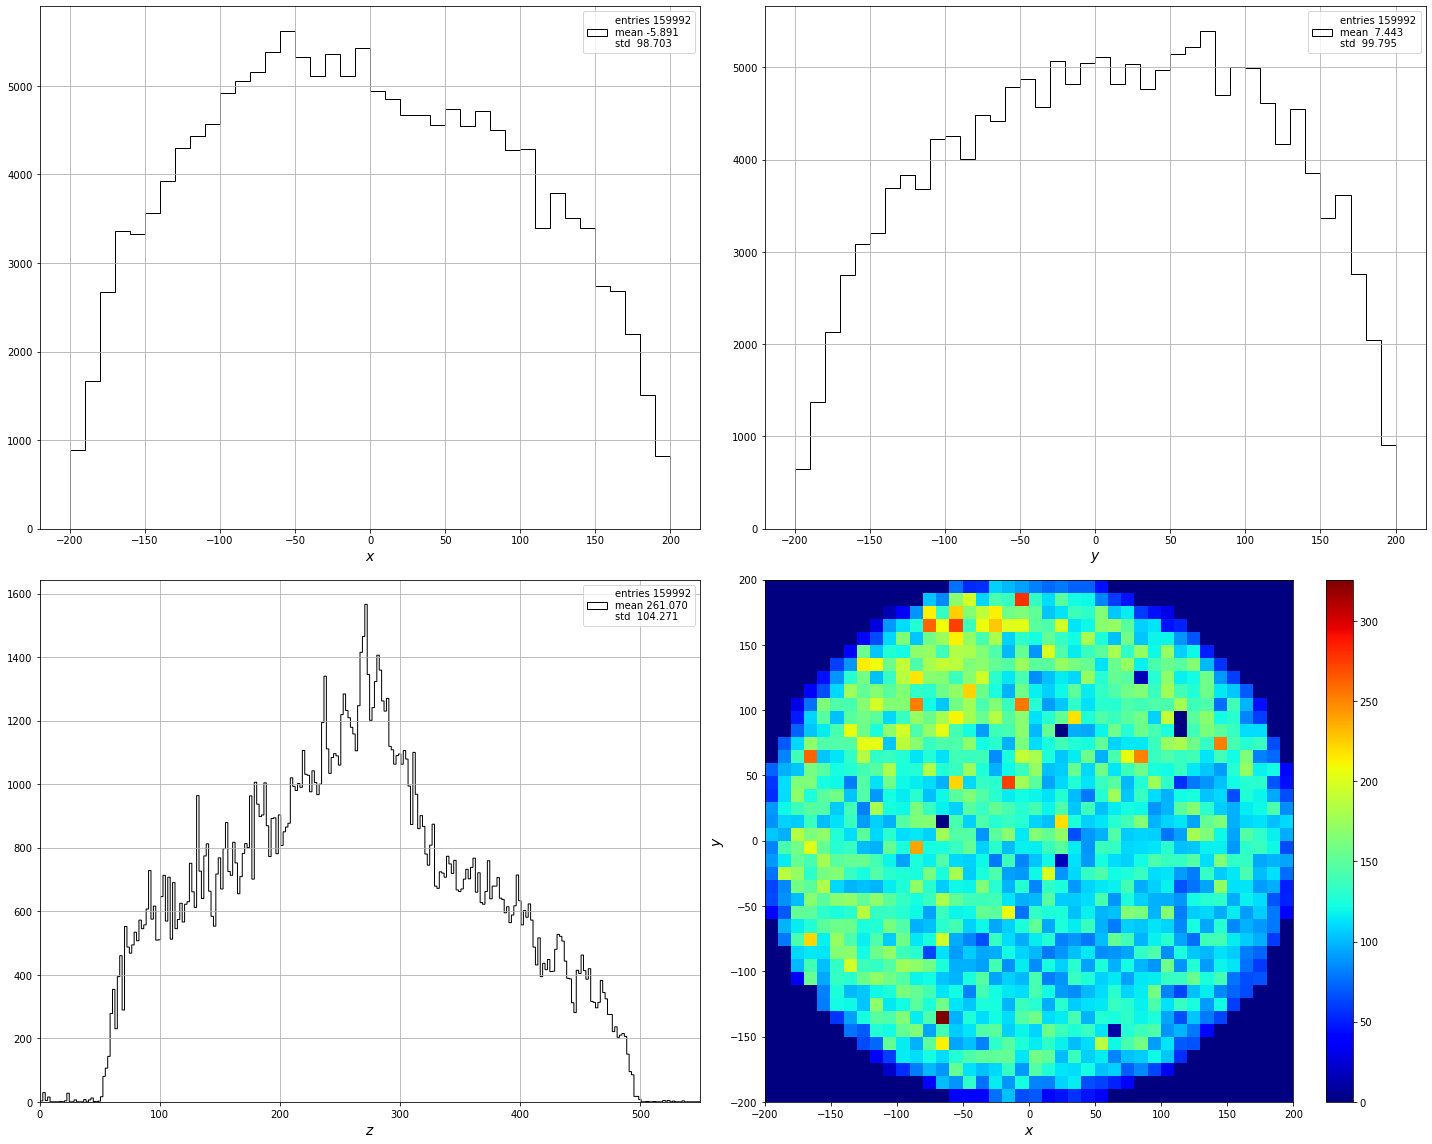

In [11]:
xbins = ut.arstep(dfiso.x, 10., True)
ybins = ut.arstep(dfiso.y, 10., True)
zbins = ut.arstep(dfiso.z,  2., True)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hist(dfiso.x, xbins);
plt.xlabel(r'$x$', fontsize = 14)

subplot(2)
pltext.hist(dfiso.y, ybins);
plt.xlabel(r'$y$', fontsize = 14)

subplot(3)
pltext.hist(dfiso.z, zbins);
plt.xlim((0., 550.))
plt.xlabel(r'$z$', fontsize = 14)

subplot(4)
plt.hist2d(dfiso.x, dfiso.y, (xbins, ybins), cmap = 'jet');
plt.xlabel(r'$x$', fontsize = 14); plt.ylabel(r'$y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

**Conclusions:**
    
   * There are less isolated cells in the bottom right size of the cambre (x >0, y <0) and slightly more in the top right (x <0 y >0)

## Average light and charge

In [12]:
def hprof(x, bins, weights):
    counts, _ = np.histogram(x, bins)
    values, _ = np.histogram(x, bins, weights = weights)
    sel       = counts > 0.
    print(np.sum(sel))
    values[sel] = values[sel]/(1.*counts[sel])
    centers     = ut.centers(bins) 
    return pltext.hist(centers, bins, weights = values, stats = False)

def h2prof(xs, bins, weights, **kargs):
    counts, _ = np.histogramdd(xs, bins)
    values, _ = np.histogramdd(xs, bins, weights = weights)
    sel       = counts > 0.
    print(np.sum(sel))
    values[sel] = values[sel]/(1.*counts[sel])
    icells       = clouds.to_coors(np.argwhere(sel))
    centers      = [ut.centers(ibin) for ibin in bins]
    ndim         = 2
    cells        = [centers[i][icells[i]] for i in range(ndim)]
    #xcs, ycs    = ut.centers(bins[0]), ut.centers(bins[1])
    #xcms, ycms  = np.meshgrid(xcs, ycs)
    return plt.hist2d(*cells, bins, weights = values[sel], **kargs)

Text(0.5, 0, 'Ene (keV)')

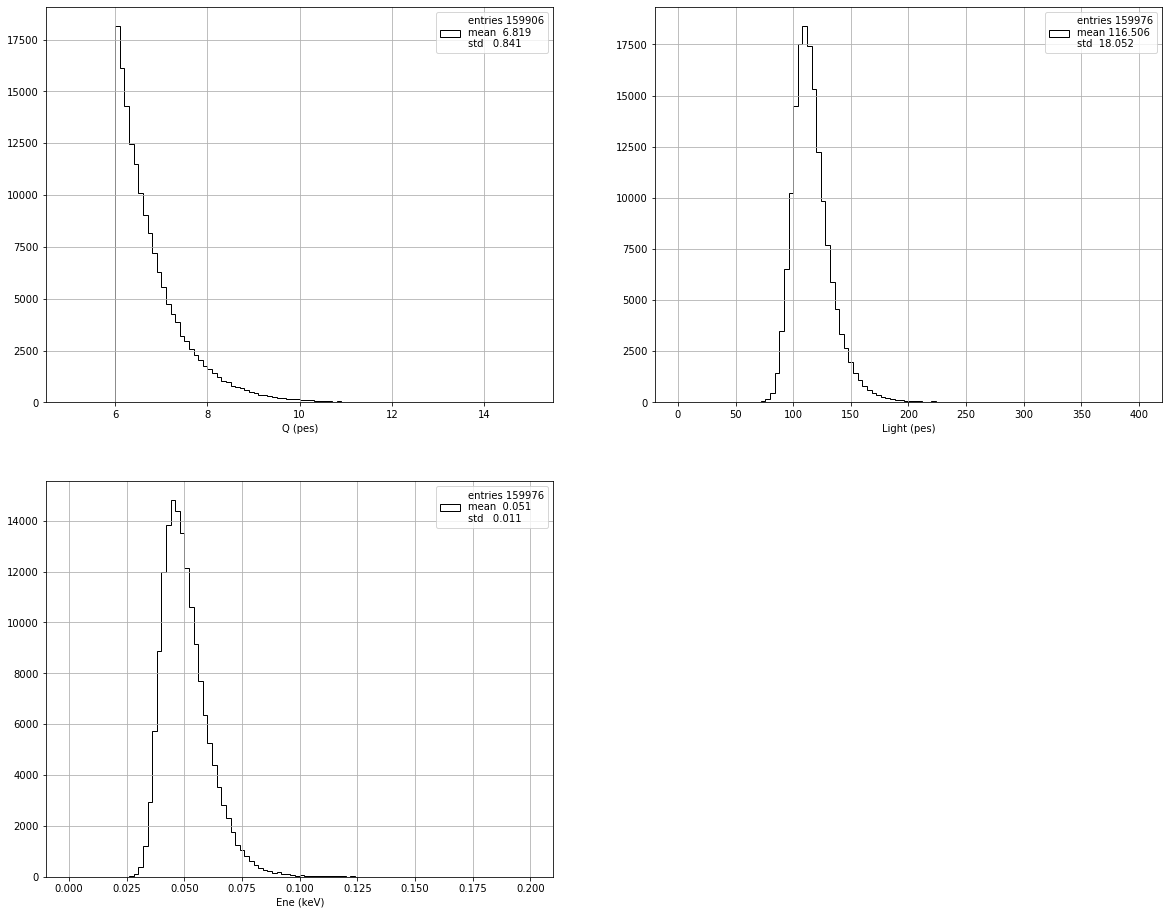

In [13]:

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hist(dfiso.q, 100, range = (5., 15)); 
plt.xlabel('Q (pes)')

subplot(2)
pltext.hist(dfiso.eraw, 100, range = (0., 400)); 
plt.xlabel('Light (pes)')

subplot(3)
pltext.hist(100. *dfiso.erec, 100, range = (0., 0.2)); 
plt.xlabel('Ene (keV)')

**Conclusions**

   * The charge looks like cuting in a tail.
   
   * The light associated and energy seems consistent with 116 pes ad 51 eV signals.

1291


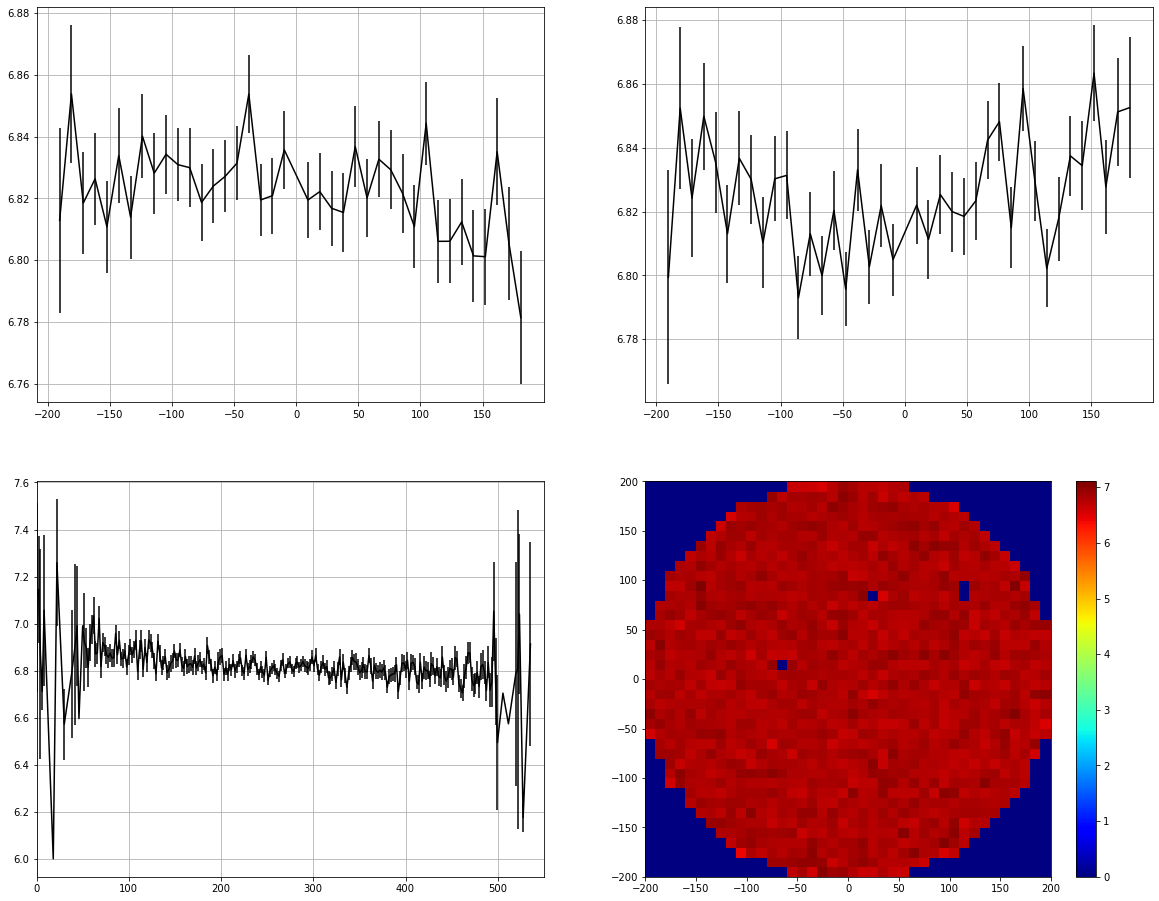

In [14]:
xbins = ut.arstep(dfiso.x, 10., True)
ybins = ut.arstep(dfiso.y, 10., True)
zbins = ut.arstep(dfiso.z,  2., True)

val   = dfiso.q

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x, val, len(xbins)); plt.grid();
#hmean(dfiso.x, xbins, dfiso.q);

subplot(2)
pltext.hprofile(dfiso.y, val, len(ybins)); plt.grid();


subplot(3)
pltext.hprofile(dfiso.z, val, len(zbins)); plt.grid();
plt.xlim((0., 550.));

subplot(4)
h2prof((dfiso.x, dfiso.y), (xbins, ybins),  val, cmap = 'jet');
plt.colorbar();

1291


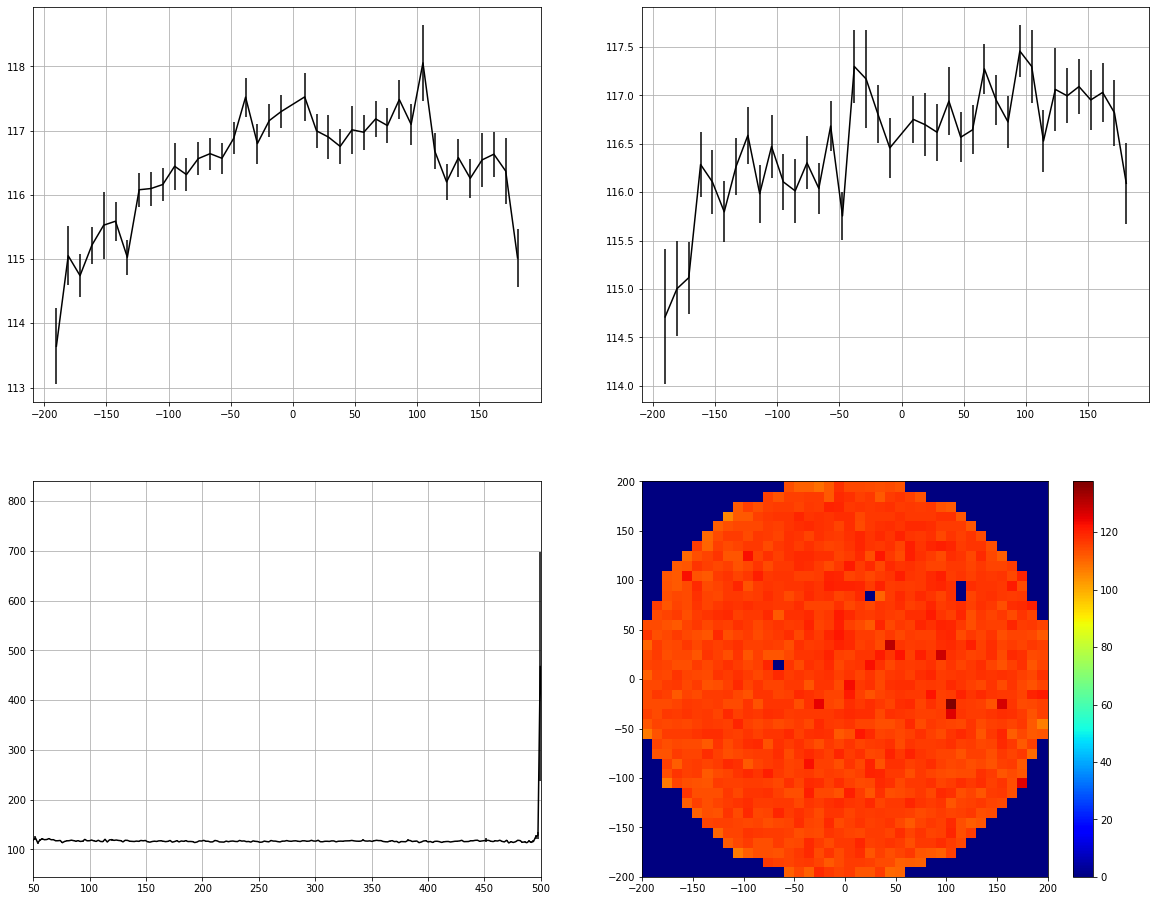

In [15]:
xbins = ut.arstep(dfiso.x, 10., True)
ybins = ut.arstep(dfiso.y, 10., True)
zbins = ut.arstep(dfiso.z,  2., True)

val   = 1000. * dfiso.erec
val   =         dfiso.eraw

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x, val, len(xbins)); plt.grid();
#hmean(dfiso.x, xbins, dfiso.q);

subplot(2)
pltext.hprofile(dfiso.y, val, len(ybins)); plt.grid();


subplot(3)
pltext.hprofile(dfiso.z, val, len(zbins)); plt.grid();
plt.xlim((50., 500.));

subplot(4)
h2prof((dfiso.x, dfiso.y), (xbins, ybins),  val, cmap = 'jet');
plt.colorbar();

1291


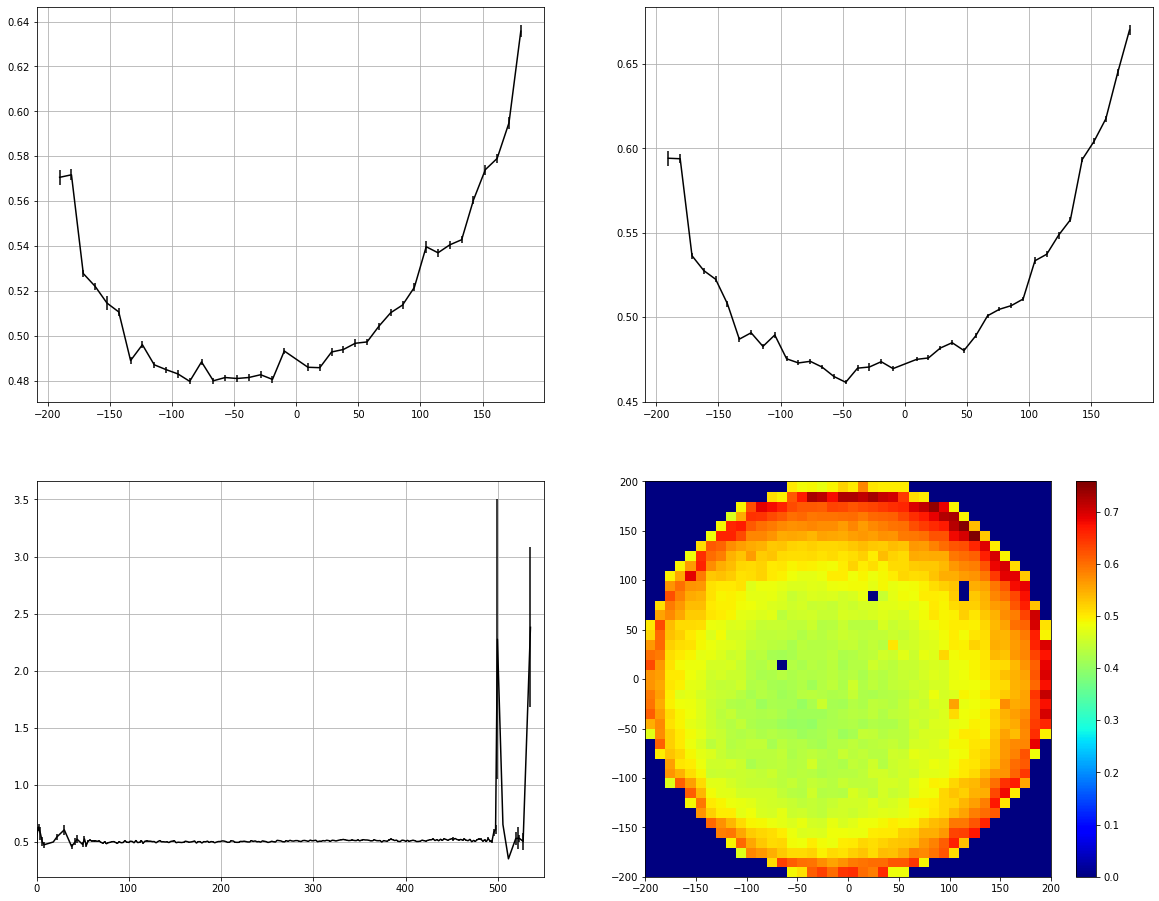

In [16]:
xbins = ut.arstep(dfiso.x, 10., True)
ybins = ut.arstep(dfiso.y, 10., True)
zbins = ut.arstep(dfiso.z,  2., True)

val   = 1000. * dfiso.erec

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x, val, len(xbins)); plt.grid();
#hmean(dfiso.x, xbins, dfiso.q);

subplot(2)
pltext.hprofile(dfiso.y, val, len(ybins)); plt.grid();


subplot(3)
pltext.hprofile(dfiso.z, val, len(zbins)); plt.grid();
plt.xlim((0., 550.));

subplot(4)
h2prof((dfiso.x, dfiso.y), (xbins, ybins),  val, cmap = 'jet');
plt.colorbar();

**Conclusions:**
    
   * The energy associated to them is larger for the outer ring, and on top

   

## Position respect the main node

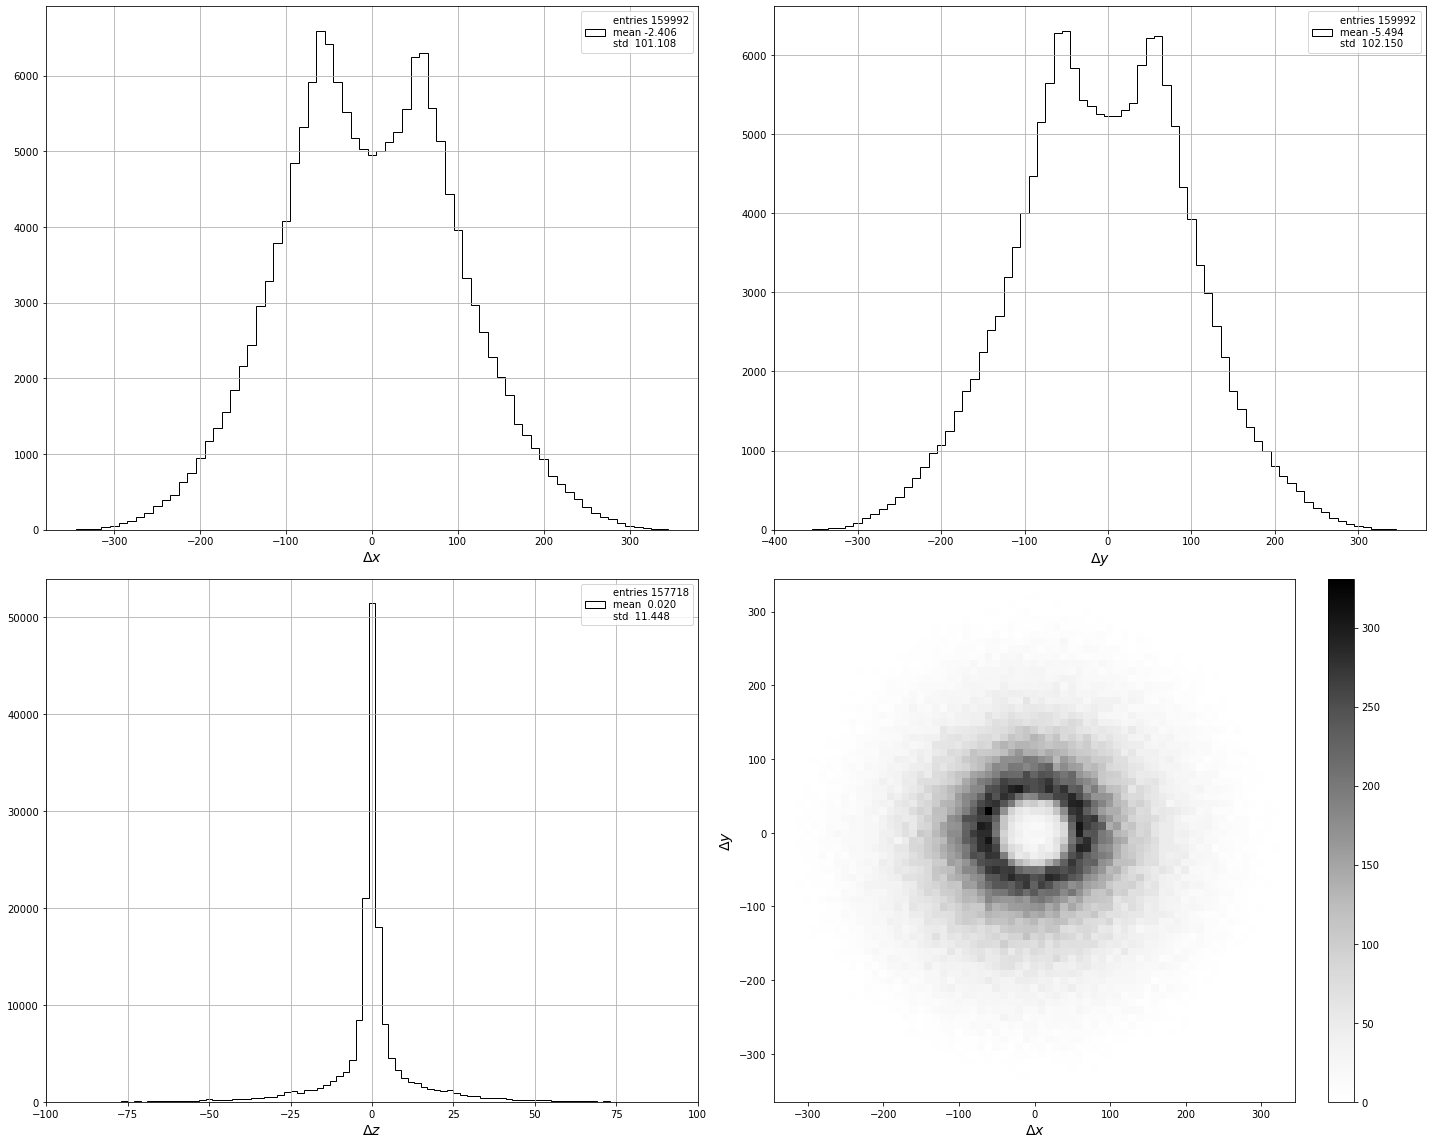

In [17]:
xbins = ut.arstep(dfiso.x - dfiso.xb, 10., True)
ybins = ut.arstep(dfiso.y - dfiso.yb, 10., True)
zbins = ut.arstep(dfiso.z - dfiso.zb,  2., True)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hist(dfiso.x - dfiso.xb, xbins);
plt.xlabel(r'$\Delta x$', fontsize = 14)

subplot(2)
pltext.hist(dfiso.y - dfiso.yb, ybins);
plt.xlabel(r'$\Delta y$', fontsize = 14)

subplot(3)
pltext.hist(dfiso.z - dfiso.zb, zbins, range = (-50., 50.));
plt.xlim((-100., 100));
plt.xlabel(r'$\Delta z$', fontsize = 14)

subplot(4)
plt.hist2d(dfiso.x - dfiso.xb, dfiso.y - dfiso.yb, (xbins, ybins), cmap = 'Greys');
plt.xlabel(r'$\Delta x$', fontsize = 14); plt.ylabel(r'$\Delta y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

**Conclusions**:
    
   * Most of the isolated cells are centered around the z-position of the most energetic node, and make a crater of 50 mm radious.
   
   
   * Isolated cells are associated with the most energetic node of the event!

## Charge and light respect the main node

3358


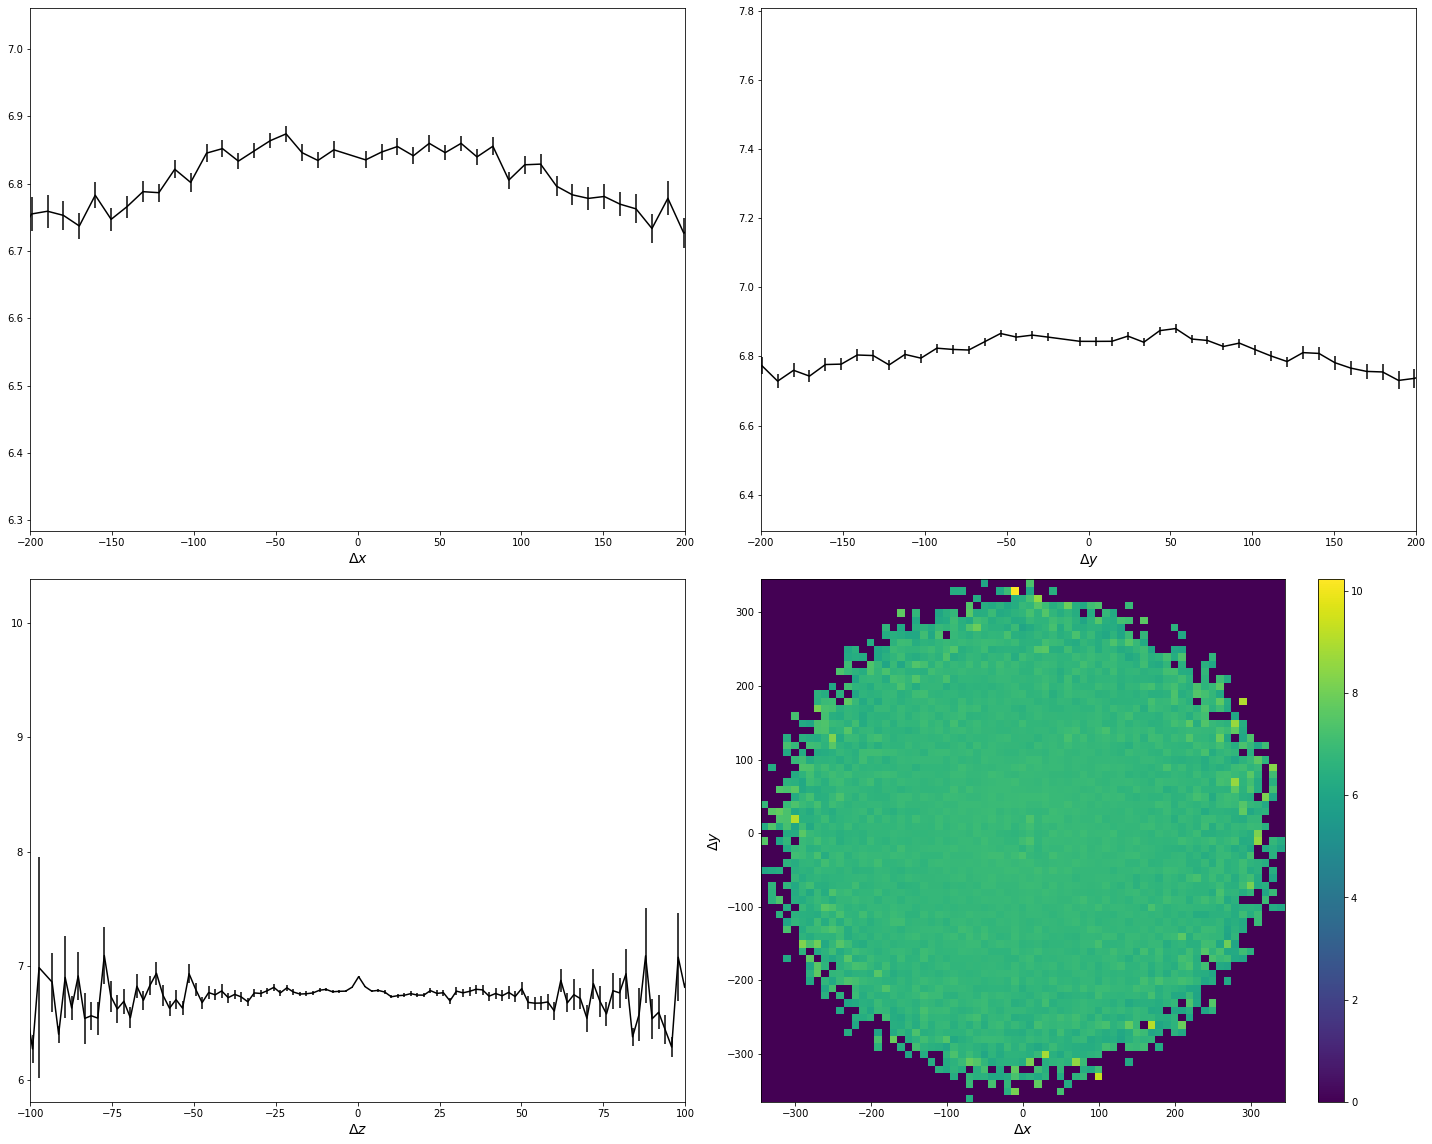

In [18]:
xbins = ut.arstep(dfiso.x - dfiso.xb, 10., True)
ybins = ut.arstep(dfiso.y - dfiso.yb, 10., True)
zbins = ut.arstep(dfiso.z - dfiso.zb,  2., True)

val   = dfiso.q

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x - dfiso.xb, val, len(xbins));
plt.xlabel(r'$\Delta x$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(2)
pltext.hprofile(dfiso.y - dfiso.yb, val, len(ybins));
plt.xlabel(r'$\Delta y$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(3)
pltext.hprofile(dfiso.z - dfiso.zb, val, len(zbins));
plt.xlabel(r'$\Delta z$', fontsize = 14)
plt.xlim((-100., 100.))

subplot(4)
h2prof((dfiso.x - dfiso.xb, dfiso.y - dfiso.yb), (xbins, ybins), val);
plt.xlabel(r'$\Delta x$', fontsize = 14); plt.ylabel(r'$\Delta y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

3358


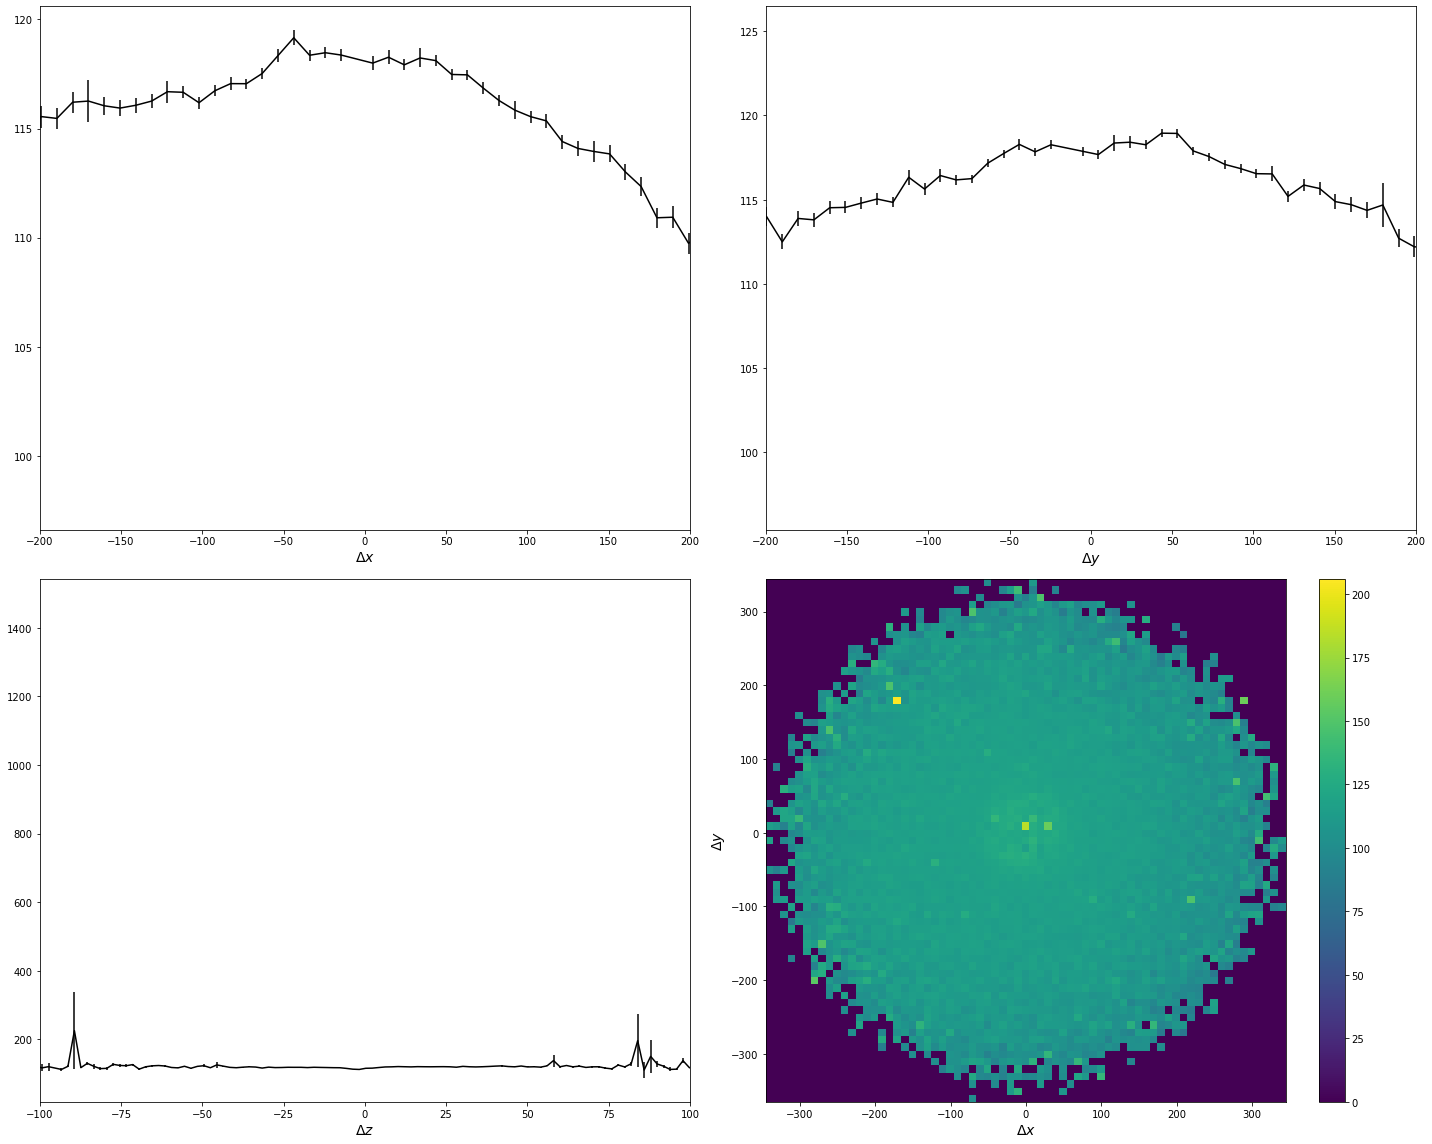

In [19]:
xbins = ut.arstep(dfiso.x - dfiso.xb, 10., True)
ybins = ut.arstep(dfiso.y - dfiso.yb, 10., True)
zbins = ut.arstep(dfiso.z - dfiso.zb,  2., True)

val   = dfiso.eraw

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x - dfiso.xb, val, len(xbins));
plt.xlabel(r'$\Delta x$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(2)
pltext.hprofile(dfiso.y - dfiso.yb, val, len(ybins));
plt.xlabel(r'$\Delta y$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(3)
pltext.hprofile(dfiso.z - dfiso.zb, val, len(zbins));
plt.xlabel(r'$\Delta z$', fontsize = 14)
plt.xlim((-100., 100.))

subplot(4)
h2prof((dfiso.x - dfiso.xb, dfiso.y - dfiso.yb), (xbins, ybins), val);
plt.xlabel(r'$\Delta x$', fontsize = 14); plt.ylabel(r'$\Delta y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

3358


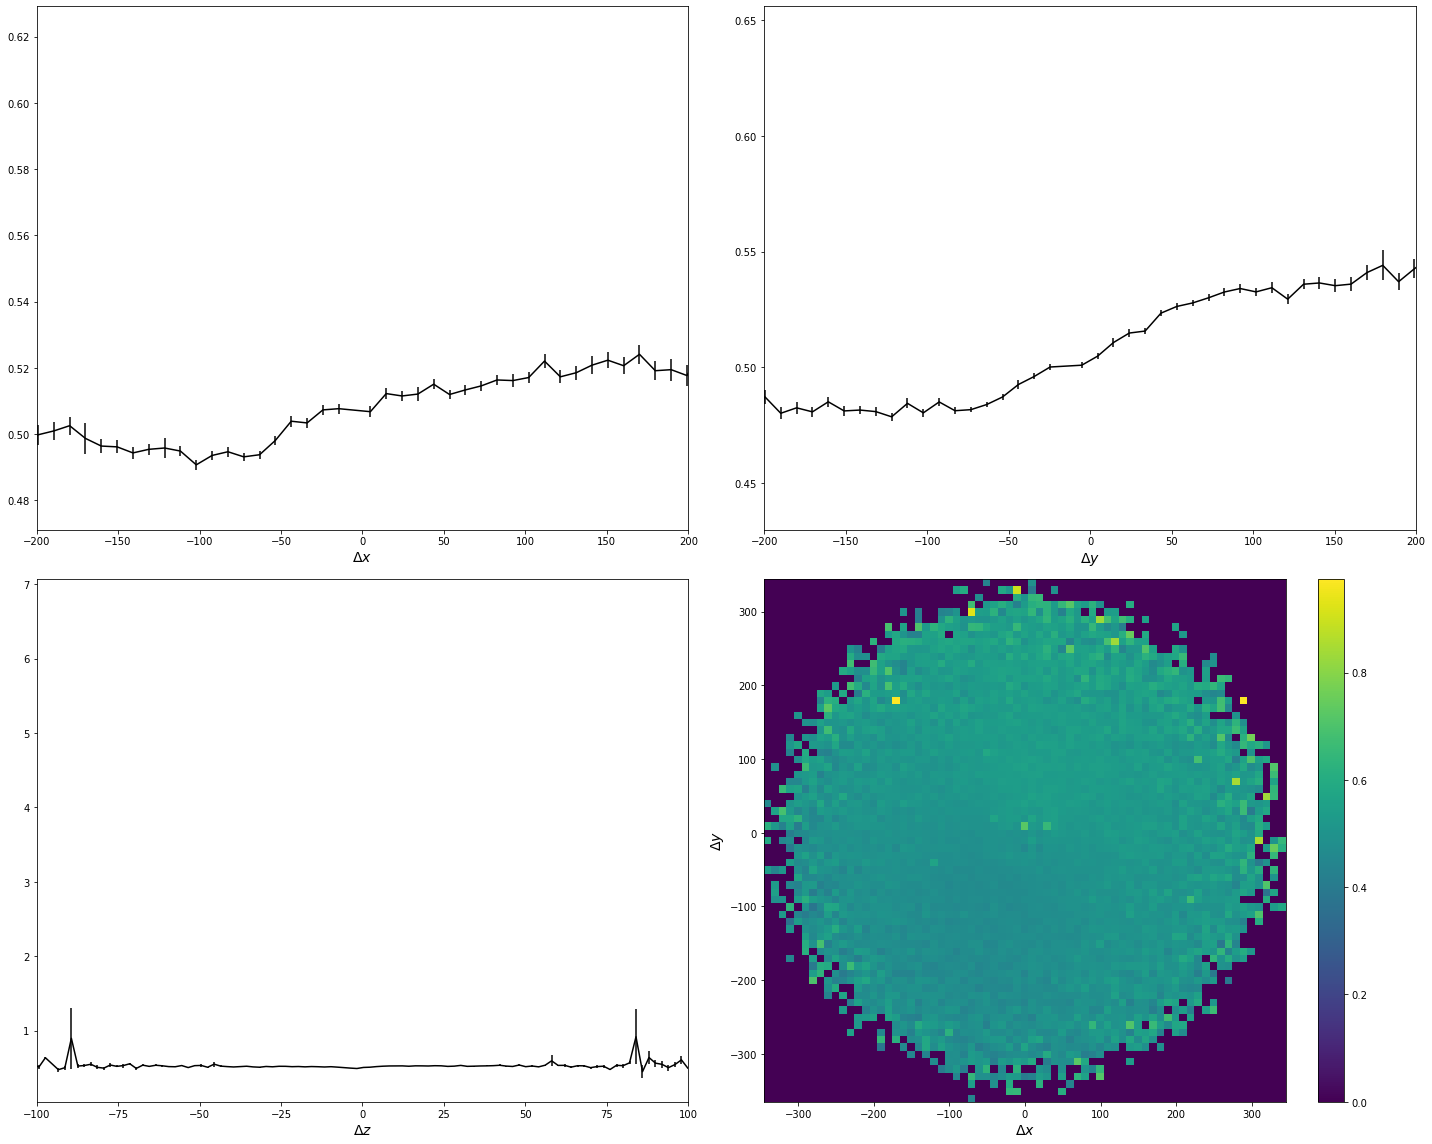

In [20]:
xbins = ut.arstep(dfiso.x - dfiso.xb, 10., True)
ybins = ut.arstep(dfiso.y - dfiso.yb, 10., True)
zbins = ut.arstep(dfiso.z - dfiso.zb,  2., True)

val   = 1000. * dfiso.erec

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
pltext.hprofile(dfiso.x - dfiso.xb, val, len(xbins));
plt.xlabel(r'$\Delta x$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(2)
pltext.hprofile(dfiso.y - dfiso.yb, val, len(ybins));
plt.xlabel(r'$\Delta y$', fontsize = 14)
plt.xlim((-200., 200.))

subplot(3)
pltext.hprofile(dfiso.z - dfiso.zb, val, len(zbins));
plt.xlabel(r'$\Delta z$', fontsize = 14)
plt.xlim((-100., 100.))

subplot(4)
h2prof((dfiso.x - dfiso.xb, dfiso.y - dfiso.yb), (xbins, ybins), val);
plt.xlabel(r'$\Delta x$', fontsize = 14); plt.ylabel(r'$\Delta y$', fontsize = 14)
plt.colorbar();
plt.tight_layout();

## Extend energy of the most energetic node

In [36]:
#ddmin  = df.groupby('event').min()
#dftemp = pd.DataFrame({'event'      : df.event.values,
#                       'evt_enode1' : df.evt_enode1.values})
#dfiso_ext = pd.merge(dfiso, dftemp, on = 'event')
#dfiso_ext

### Inspection

In [37]:
##df

In [38]:
ranges = {'zminHT'            : ( 50., 500.),
          'zmaxHT'            : ( 50., 500.),
          'rmaxHT'            : (  0., 180.),
          'erecHT'            : (1.55, 1.75),
          'evt_outcells.none' : (0., 0.5),
          'evt_ecells': (1.55, 1.75),
          'trk_ecells': (1.55, 1.75)
         }

selections = bes.Selections(df, ranges)

selections.logical_and(('zminHT', 'zmaxHT', 'rmaxHT', 'erecHT'), 'fidutial.HT');
selections.logical_and(('fidutial.HT', 'evt_outcells.none')    , 'fidutial.LT');

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75)


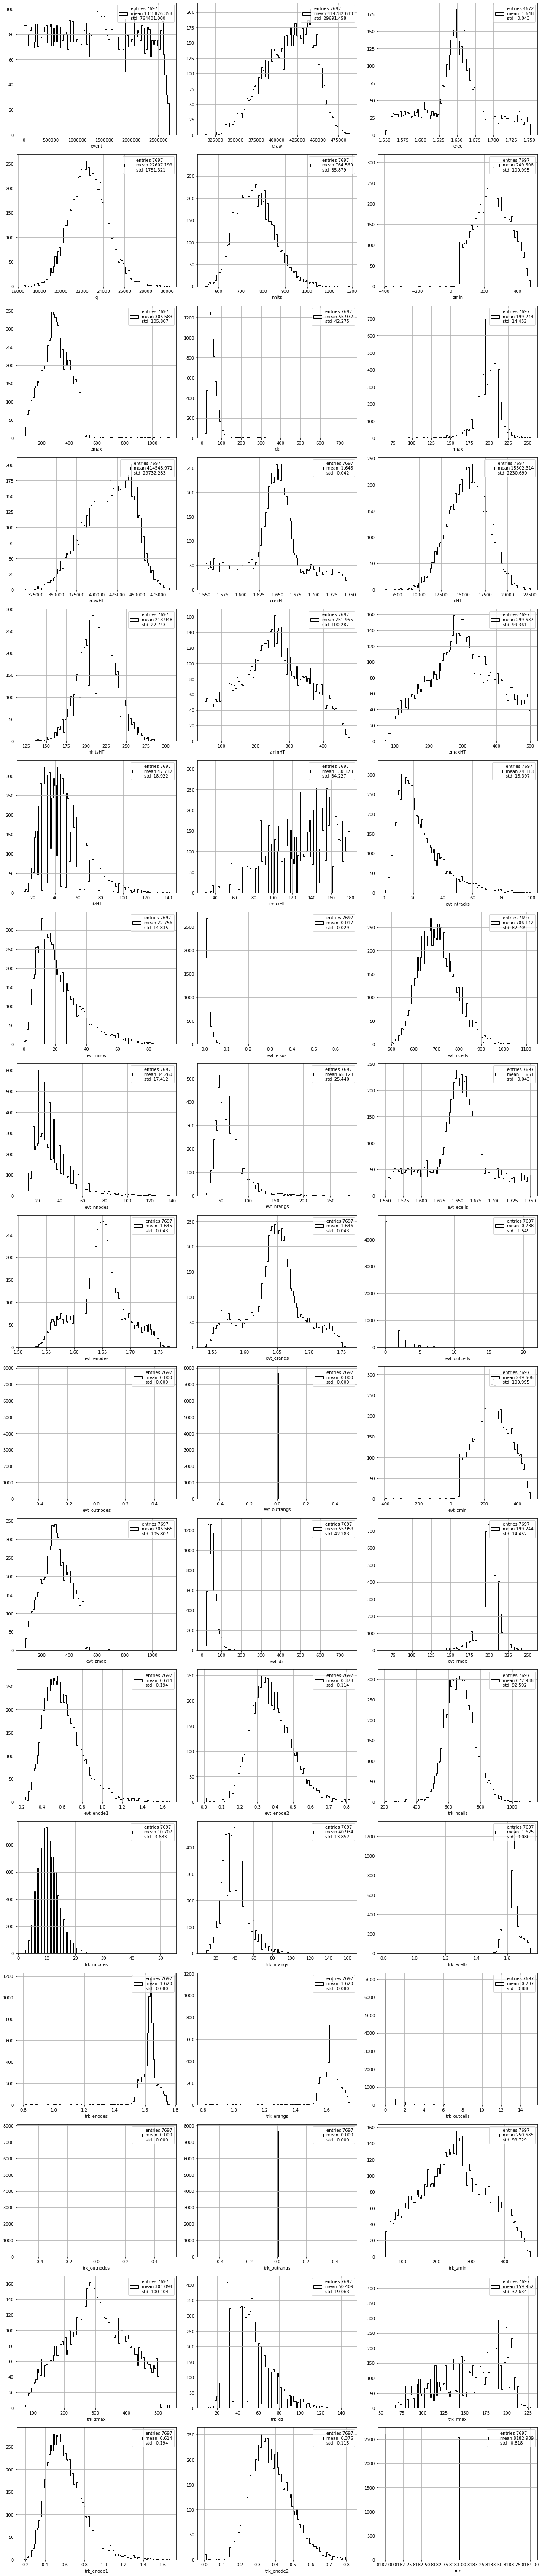

In [39]:
sel = selections['fidutial.HT']
print(sel.info)

pltext.df_inspect(df[sel], ncolumns = 3)

## Number of isolated cells vs $\Delta z$ and node energy

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5)


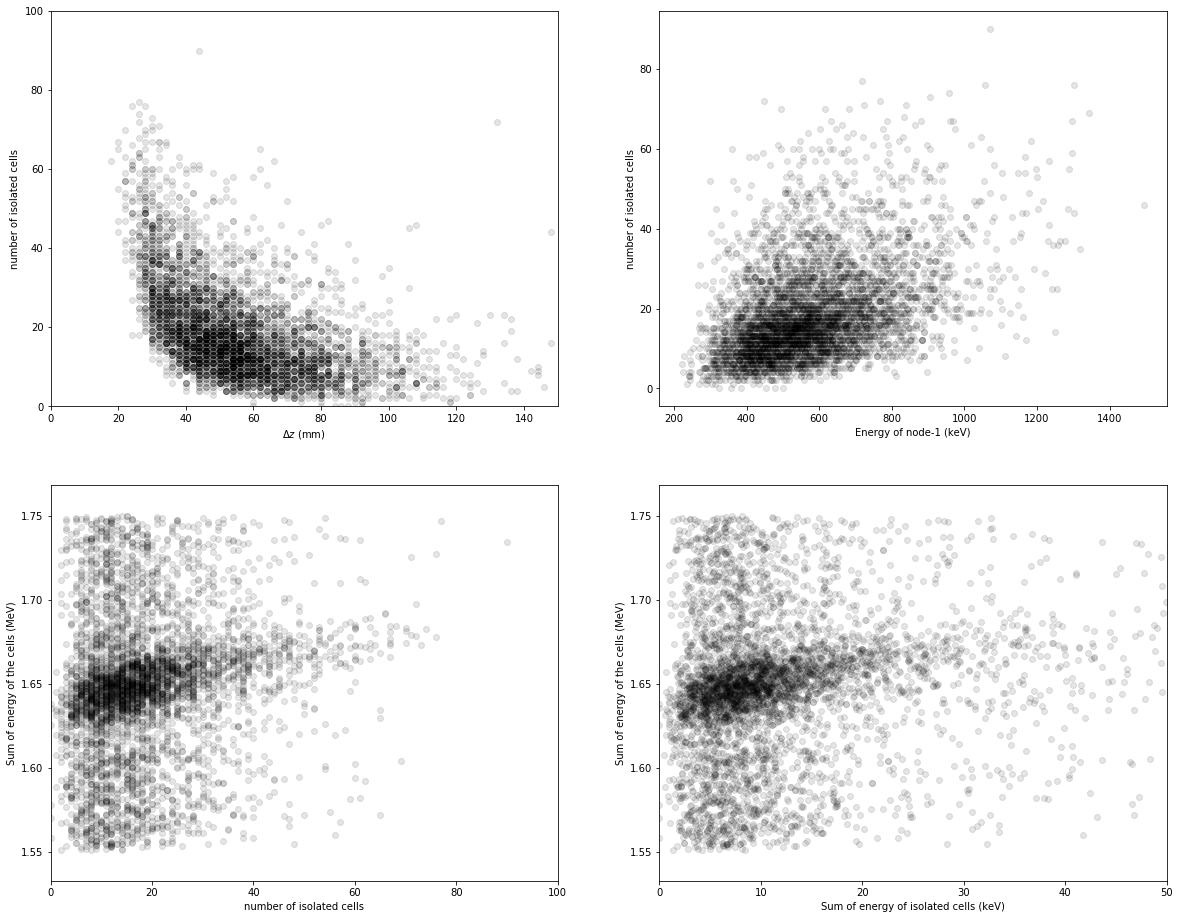

In [44]:
ranges['trk_dz.ds'] = (0., 150.)

sel     = selections['fidutial.LT']

print(sel.info)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
plt.scatter(df.evt_dz[sel], df.evt_nisos[sel], alpha = 0.1);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('number of isolated cells');
plt.xlim(ranges['trk_dz.ds']); plt.ylim((0., 100.));

subplot(2)
plt.scatter(1000. * df.evt_enode1[sel], df.evt_nisos[sel], alpha = 0.1);
plt.xlabel(r'Energy of node-1 (keV)'); plt.ylabel('number of isolated cells');

subplot(3)
plt.scatter(df.evt_nisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylabel('Sum of energy of the cells (MeV)'); plt.xlabel('number of isolated cells');
plt.xlim(ranges['trk_ecells']); plt.xlim((0., 100.));

subplot(4)
plt.scatter(1000. * df.evt_eisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylabel('Sum of energy of the cells (MeV)'); plt.xlabel('Sum of energy of isolated cells (keV)');
plt.xlim(ranges['trk_ecells']); plt.xlim((0., 50.));

### Compare HT and LT

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75)


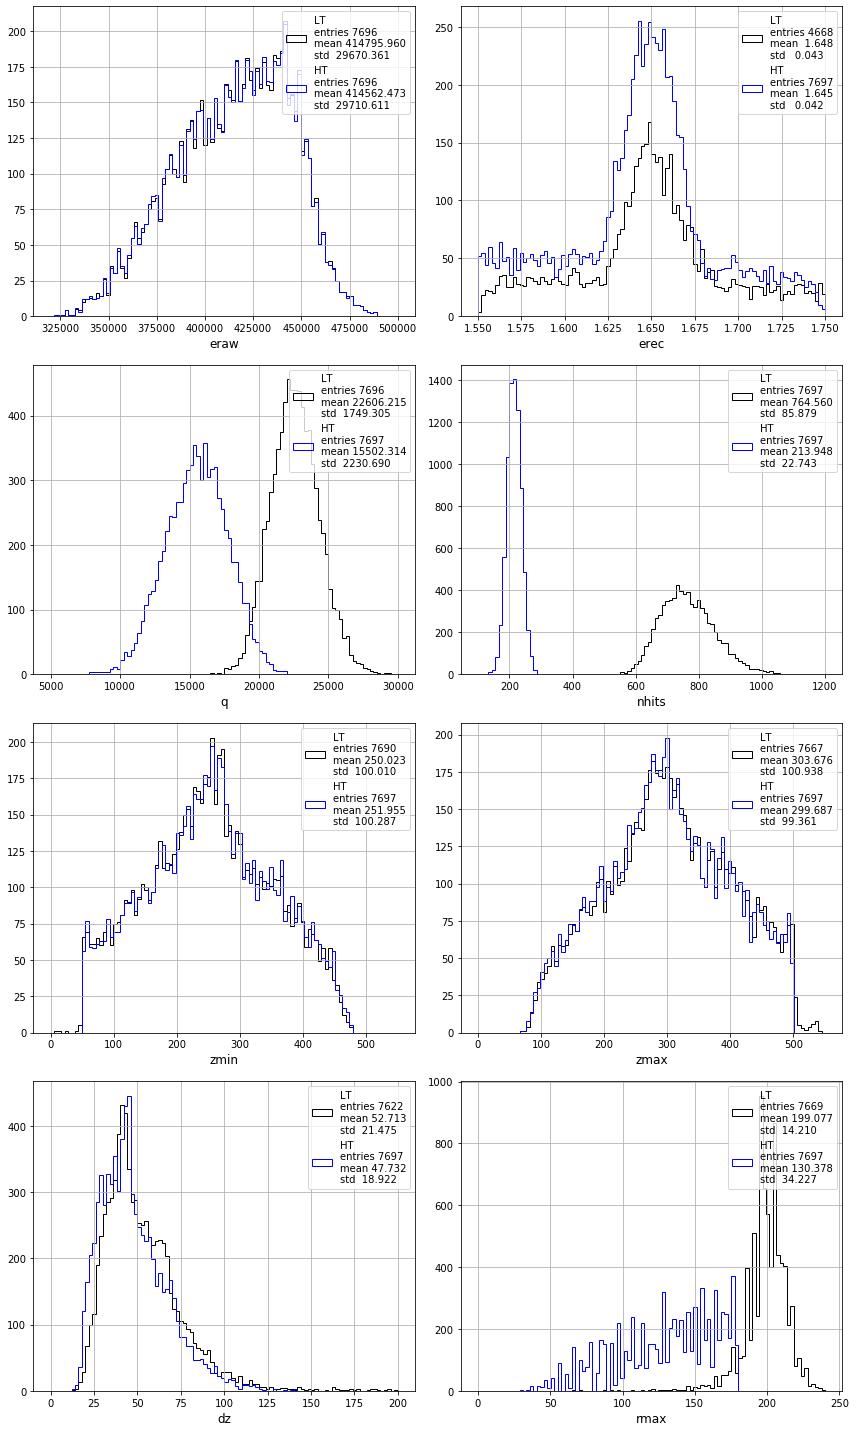

In [93]:
sel = selections['fidutial.HT']
print(sel.info)

bins     = 100
names    = ['eraw', 'erec', 'q', 'nhits', 'zmin', 'zmax', 'dz', 'rmax']
xranges  = {'eraw' : (32e4, 50e4),
            'erec' : (1.55, 1.75),
            'q'    : ( 5e3, 30e3),
            'nhits': ( 100, 1200),
            'zmin' : (  0., 550.),
            'zmax' : (  0., 550.),
            'dz'   : (  0., 200.),
            'rmax' : (  0., 240.)
           }

subplot = pltext.canvas(len(names), 2)

for i, name in enumerate(names):
    subplot(i + 1)
    pltext.hist(df[name]       [sel], bins, range = xranges[name], label = 'LT');
    pltext.hist(df[name + 'HT'][sel], bins, range = xranges[name], label = 'HT');
    plt.xlabel(name, fontsize = 12)
    plt.legend();
plt.tight_layout();


**Conclusions:**

   * For LT hits the maximum radious is quite large, at 200 mm in average!! No HT hits are above 180 (due to selections)
   
   
   * Due to LT hits out of the Kr-map, the events in Erec has decreased 4668/7697, acceptance 60.4%
   
   
   * Charge decreased by a factor 0.58, and the number of hits by 0.2, from 764 to 213 hits!
   
   
   * Also $\Delta z$ decreases in average from 52.7 mm to 47.8 mm
   


### E-resolution HT for in/out of Kr-map LT hits

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5)


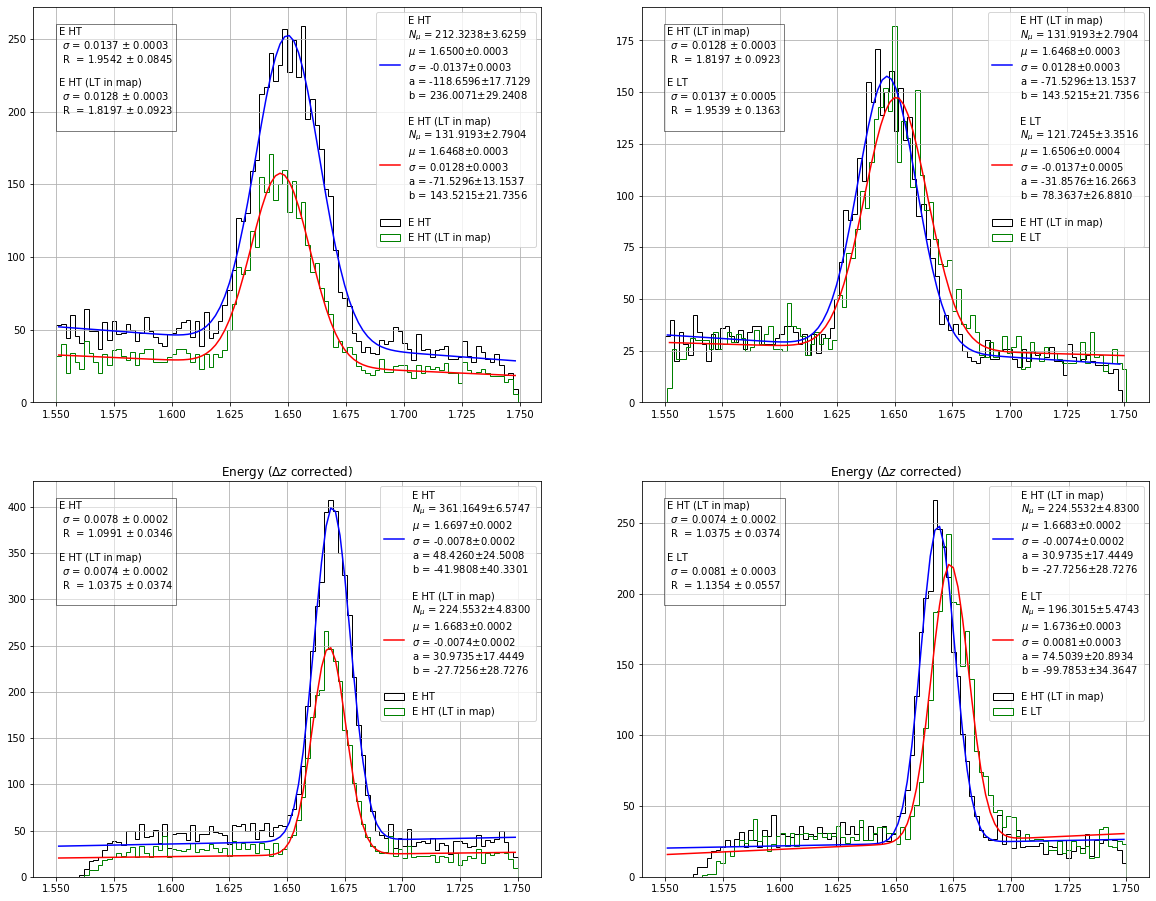

In [95]:
selHT = selections['fidutial.HT']
sel   = selections['fidutial.LT']
print(sel.info)

bins      = 100
formate   = '6.4f'

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
ss1, _, _ = pltbes.pfit_energy(df.erecHT[selHT], bins, formate = formate, label = 'E HT');
ss2, _, _ = pltbes.pfit_energy(df.erecHT[sel]  , bins, formate = formate, label = 'E HT (LT in map)')
pltext.plt_text(ss1 + '\n' + ss2)

subplot(2)
ss1, _, _ = pltbes.pfit_energy(df.erecHT[sel], bins, formate = formate, label = 'E HT (LT in map)');
ss2, _, _ = pltbes.pfit_energy(df.erec  [sel], bins, formate = formate, label = 'E LT');
pltext.plt_text(ss1 + '\n' + ss2)

df['erecC']   = bes.energy_correction(df.erec.values  , df.dz.values)
df['erecHTC'] = bes.energy_correction(df.erecHT.values, df.dzHT.values)


subplot(3)
ss1, _, _ = pltbes.pfit_energy(df.erecHTC[selHT], bins,
                               range = ranges['erecHT'], formate = formate, label = 'E HT');
ss2, _, _ = pltbes.pfit_energy(df.erecHTC[sel]  , bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E HT (LT in map)')
plt.title(r'Energy ($\Delta z$ corrected)')
pltext.plt_text(ss1 + '\n' + ss2)

subplot(4)
ss1, _, _ = pltbes.pfit_energy(df.erecHTC[sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E HT (LT in map)');
ss2, _, _ = pltbes.pfit_energy(df.erecC  [sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E LT');
plt.title(r'Energy ($\Delta z$ corrected)')
pltext.plt_text(ss1 + '\n' + ss2)



**Conclusions:**

   * Energy resolution is slightly better with HT (LT in Kr map) but compatible with LT hits.
   

### Energy in track

overwriting  fidutial.LT.trk_ecells  selection
zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5) & trk_ecells [1.55, 1.75)


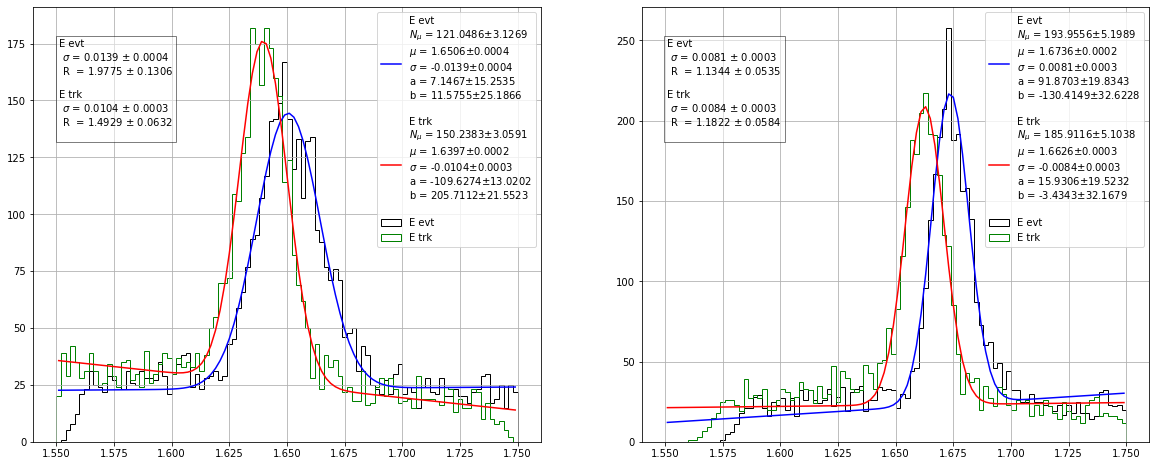

In [99]:
sel   = selections.logical_and(('fidutial.LT', 'trk_ecells'), 'fidutial.LT.trk_ecells')
print(sel.info)

bins      = 100
formate   = '6.4f'

subplot = pltext.canvas(2, 2, 8, 10)

subplot(1)
ss1, _, _ = pltbes.pfit_energy(df.evt_ecells[sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E evt');
ss2, _, _ = pltbes.pfit_energy(df.trk_ecells[sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E trk')
pltext.plt_text(ss1 + '\n' + ss2)

subplot(2)
df['evt_ecellsC'] = bes.energy_correction(df.evt_ecells.values, df.evt_dz.values)
df['trk_ecellsC'] = bes.energy_correction(df.trk_ecells.values, df.trk_dz.values)

ss1, _, _ = pltbes.pfit_energy(df.evt_ecellsC[sel], bins, 
                               range = ranges['erecHT'], formate = formate, label = 'E evt');
ss2, _, _ = pltbes.pfit_energy(df.trk_ecellsC[sel], bins,
                               range = ranges['erecHT'], formate = formate, label = 'E trk');
pltext.plt_text(ss1 + '\n' + ss2)


#subplot(3)
#ss1, _, _ = pltbes.pfit_energy(df.erecHTC[selHT], bins,
#                               range = ranges['erecHT'], formate = formate, label = 'E HT');
#ss2, _, _ = pltbes.pfit_energy(df.erecHTC[sel]  , bins, 
#                               range = ranges['erecHT'], formate = formate, label = 'E HT (LT in map)')
#plt.title(r'Energy ($\Delta z$ corrected)')
#pltext.plt_text(ss1 + '\n' + ss2)

#subplot(4)
#ss1, _, _ = pltbes.pfit_energy(df.erecHTC[sel], bins, 
#                               range = ranges['erecHT'], formate = formate, label = 'E HT (LT in map)');
#ss2, _, _ = pltbes.pfit_energy(df.erecC  [sel], bins, 
#                               range = ranges['erecHT'], formate = formate, label = 'E LT');
#plt.title(r'Energy ($\Delta z$ corrected)')
#pltext.plt_text(ss1 + '\n' + ss2)


#subplot(3)
#ss1, _, _ = pltbes.pfit_energy(df.trk_ecells[sel], bins, formate = None, label = 'E-track-cells');
#ss2, _, _ = pltbes.pfit_energy(df.trk_enodes[sel], bins, formate = None, label = 'E-track-nodes')
#ss3, _, _ = pltbes.pfit_energy(df.trk_enodes[sel], bins, formate = None, label = 'E-track-rangs')
#pltext.plt_text(ss1 + ss2 + ss3)

#subplot(4)
#ss1, _, _ = pltbes.pfit_energy(df.evt_ecells[sel], bins, formate = None, label = 'E-evt-cells');
#ss2, _, _ = pltbes.pfit_energy(df.trk_ecells[sel], bins, formate = None, label = 'E-track-cells')
#pltext.plt_text(ss1 + ss2)

### Dz - effect

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5) & trk_ecells [1.55, 1.75)


(0.0, 120.0)

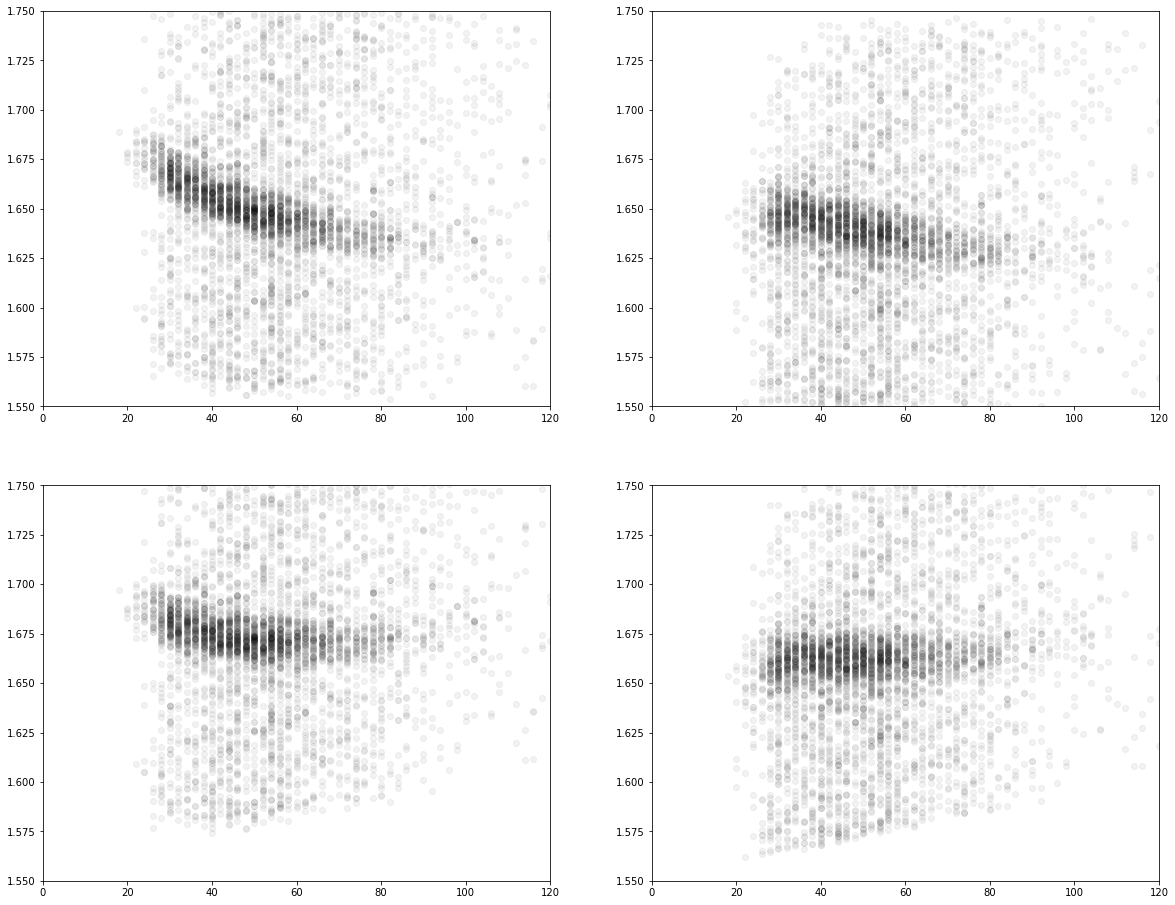

In [107]:
sel = selections['fidutial.LT.trk_ecells']
print(sel.info)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
plt.scatter(df.evt_dz[sel], df.evt_ecells[sel], alpha = 0.05);
plt.ylim(ranges['trk_ecells']); plt.xlim((0., 120.))

subplot(2)
plt.scatter(df.trk_dz[sel], df.trk_ecells[sel], alpha = 0.05);
plt.ylim(ranges['trk_ecells']); plt.xlim((0., 120.))

subplot(3)
plt.scatter(df.evt_dz[sel], df.evt_ecellsC[sel], alpha = 0.05);
plt.ylim(ranges['trk_ecells']); plt.xlim((0., 120.))

subplot(4)
plt.scatter(df.trk_dz[sel], df.trk_ecellsC[sel], alpha = 0.05);
plt.ylim(ranges['trk_ecells']); plt.xlim((0., 120.))




**Conclusions:**

  * $\Delta z$ effect more pronounced for events than for track
  
  * The correction works better for the main track, but there is more dispersion than for the event!
  
  

### Isolated clouds

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5) & trk_ecells [1.55, 1.75)


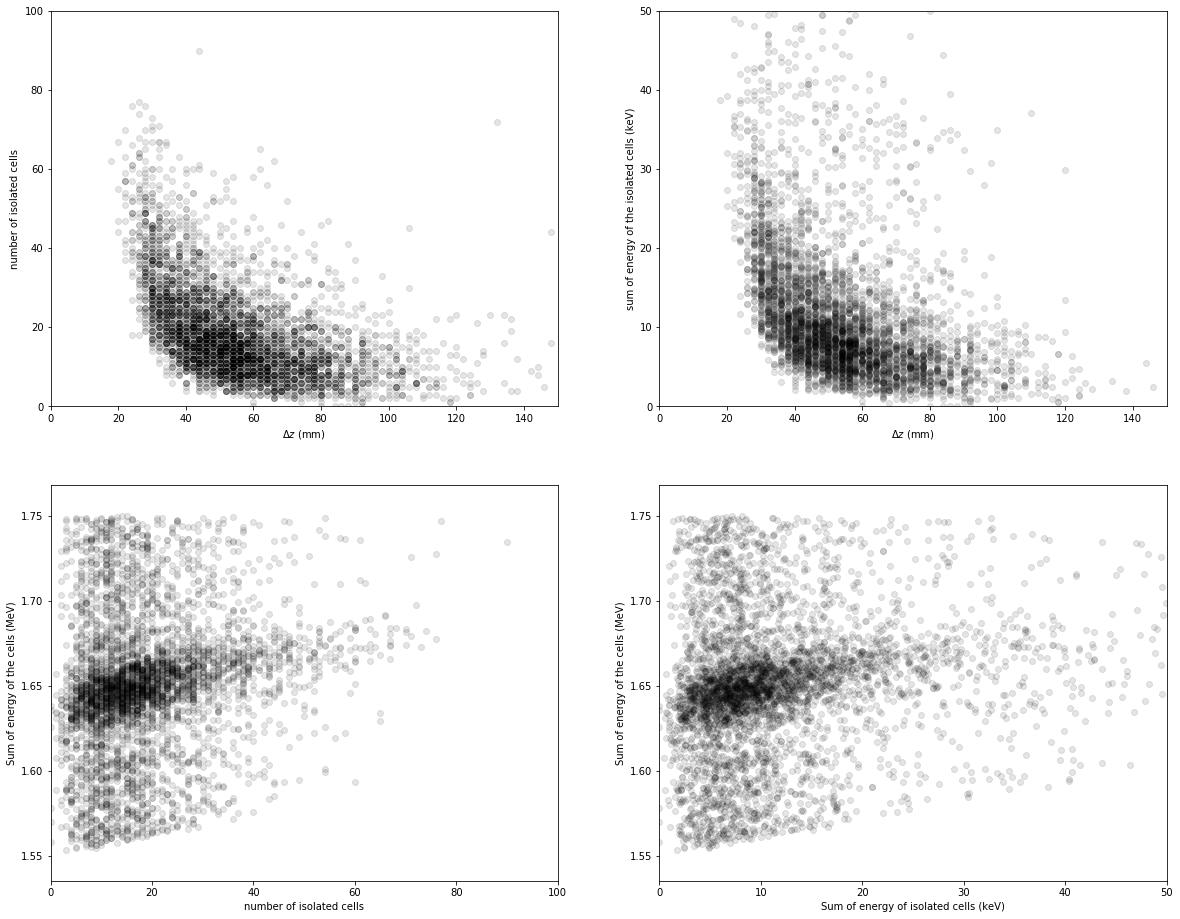

In [116]:
ranges['trk_dz.ds'] = (0., 150.)

sel     = selections['fidutial.LT.trk_ecells']

print(sel.info)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
plt.scatter(df.evt_dz[sel], df.evt_nisos[sel], alpha = 0.1);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('number of isolated cells');
plt.xlim(ranges['trk_dz.ds']); plt.ylim((0., 100.));

subplot(2)
plt.scatter(df.trk_dz[sel], 1000. * df.evt_eisos[sel], alpha = 0.1);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('sum of energy of the isolated cells (keV)');
plt.xlim(ranges['trk_dz.ds']); plt.ylim((0., 50.));

subplot(3)
plt.scatter(df.evt_nisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylabel('Sum of energy of the cells (MeV)'); plt.xlabel('number of isolated cells');
plt.xlim(ranges['trk_ecells']); plt.xlim((0., 100.));

subplot(4)
plt.scatter(1000. * df.evt_eisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylabel('Sum of energy of the cells (MeV)'); plt.xlabel('Sum of energy of isolated cells (keV)');
plt.xlim(ranges['trk_ecells']); plt.xlim((0., 50.));

**Conclusions:**
    
   * Number of isolated cells is correlated with $\Delta z$, more isolated cells with smaller $\Delta z$


   * Sum of the energy of the events correlated with $\Delta z$, more energy with more isolated cells


   * if Isolated cells are removed and the total light associated to main track (HT-hits) then, shorter tracks have more light, more 'energy'.

In [41]:
print(df.columns)
print(np.sum(df.evt_outcells));

Index(['event', 'eraw', 'erec', 'nhits', 'evt_ntracks', 'evt_nisos',
       'evt_eisos', 'evt_ncells', 'evt_nnodes', 'evt_nrangs', 'evt_ecells',
       'evt_enodes', 'evt_erangs', 'evt_outcells', 'evt_outnodes',
       'evt_outrangs', 'evt_zmin', 'evt_zmax', 'evt_dz', 'evt_rmax',
       'evt_enode1', 'evt_enode2', 'trk_ncells', 'trk_nnodes', 'trk_nrangs',
       'trk_ecells', 'trk_enodes', 'trk_erangs', 'trk_outcells',
       'trk_outnodes', 'trk_outrangs', 'trk_zmin', 'trk_zmax', 'trk_dz',
       'trk_rmax', 'trk_enode1', 'trk_enode2', 'run'],
      dtype='object')
0.0


### Code

In [5]:
get_chits_filename = chits.get_chits_filename
get_krmap_filename = chits.get_krmap_filename
get_maps           = chits.get_maps
get_hits           = chits.get_hits

#runs      = [8182, 8183, 8184]
runs      = [8182,]
sample    = 'ds'


def load_data(runs, sample_label = 'ds'):
    
    fnames  = [get_chits_filename(run, sample_label + '_rough') for run in runs]
    print(fnames)
    dfhits   = [pd.read_hdf(fname, 'CHITs.lowTh') for fname in fnames]
    dfhitHTs = [pd.read_hdf(fname, 'CHITs.highTh') for fname in fnames]


    fnames = [get_krmap_filename(run) for run in runs]
    dmaps   = [get_maps(fname) for fname in fnames]


    return (dfhits, dfhitHTs, dmaps)


def run_cloudsdia(runs, sample_label = 'ds', ntotal = 10000):
    """ run clouds and recompute energy
    """

    dfhits, dfhitHTs, dmaps = load_data(runs, sample_label)
    
    ddhs   = [cloudsdia(dfh, dfhHT, dmap, ntotal) for dfh, dfhHT, dmap in zip(dfhits, dfhitHTs, dmaps)]
    
    ddh    = bes.df_concat(ddhs, runs)
    
    return ddh


def cloudsdia(dfhit, dfhitHT, maps, ntotal):
            
    
    def get_coorfac():
        
        vdrift    = np.mean(maps.t_evol.dv)
        print('drift velocity ', vdrift)
        _corrfac  = cof.apply_all_correction(maps, apply_temp = True,
                                        norm_strat = cof.norm_strategy.kr)
        def corrfac(x, y, z, times):
            dt = z/vdrift
            return _corrfac(x, y, dt, times)
        
        return corrfac

    
    corrfac = get_coorfac()
    
    nsize = len(dfhit.groupby('event'))
    print('size', nsize)
    
    labels  = ['event', 'eraw', 'erec', 'nhits']
    labels += ['evt_ntracks', 'evt_nisos', 'evt_eisos', 'evt_ncells', 'evt_nnodes', 'evt_nrangs', 
               'evt_ecells', 'evt_enodes', 'evt_erangs', 'evt_outcells', 'evt_outnodes', 'evt_outrangs', 
               'evt_zmin', 'evt_zmax', 'evt_dz', 'evt_rmax', 'evt_enode1', 'evt_enode2', 
               'trk_ncells', 'trk_nnodes', 'trk_nrangs', 'trk_ecells', 'trk_enodes', 'trk_erangs', 
               'trk_outcells', 'trk_outnodes', 'trk_outrangs', 
               'trk_zmin', 'trk_zmax', 'trk_dz', 'trk_rmax', 'trk_enode1', 'trk_enode2']
    
    dat = {}
    for label in labels:
        dat[label] = np.zeros(min(nsize, ntotal))
        
    n = -1
    for i, evt in dfhit.groupby('event'):

        n += 1
        if (n >= ntotal): continue
        
        # get hits info
        x, y, z, eraw, erec, times = get_hits(evt, ['X', 'Y', 'Z', 'E', 'Ec', 'time'])
        if (n % 100 == 0):
            print('event : ', i, ', size : ', len(eraw))
        
        # clouds
        coors = (x, y, z)
        steps = (10., 10., 2.)
        dfclouds = clouds.clouds(coors, steps, eraw)
        dfclouds = cloud_calibrate(dfclouds, corrfac, times[0])

        ##  info from hits
        dat['event'][n] = i
        dat['eraw'] [n] = np.sum(eraw)
        dat['erec'] [n] = np.sum(erec)
        dat['nhits'][n] = len(x)

        ## info from clouds
        idat = cloud_summary(dfclouds)
        for key in idat.keys():
            dat[key][n] = idat[key]
        
    return pd.DataFrame(dat)   


In [46]:
def cloud_order_tracks(df):
    
    rangers  = df.ranger .values
    erangers = df.eranger.values
    
    # get the largest energetic track
    sel      = rangers > -1
    kids     = np.unique(rangers[sel])
    enes     = np.array([np.sum(erangers[rangers == kid]) for kid in kids])
    kids, enes = clouds.sorted_by_energy(kids, enes)
    enes     = np.array(enes)
    return kids, enes


def cloud_summary(df):
    
    # get data
    x        = df.x0     .values
    y        = df.x1     .values
    z        = df.x2     .values
    ecells   = df.ene    .values
    enodes   = df.enode  .values
    erangs   = df.eranger.values
    trackid  = df.track  .values
    rangers  = df.ranger .values
    #erangers = df.eranger.values
    nsize    = len(x)
    labels   = list(df.columns)
    cout     = df.cout   .values if 'cout' in labels else np.full(nsize, False)
    
    # get the largest energetic track
    kids, enes = cloud_order_tracks(df)
    kid_track_best = kids[0]
    ntracks        = len(kids)
        
    # compute isolated tracks
    nran_trk = np.array([np.sum(rangers == kid) for kid in kids])
    ksel     = nran_trk == 1
    nisos    = np.sum(ksel)  # number of isolated ranges
    eisos    = np.sum(enes[ksel]) # energy of the isolated ranges
    
    # general information about tracks and isolated tracks
    dvals = {'evt_ntracks' : ntracks,
             'evt_nisos'   : nisos,
             'evt_eisos'   : eisos}
               
    
    # selections
    enodes0   = df.enode0.values   if 'enodes0'   in labels else enodes
    erangs0   = df.eranger0.values if 'erangers0' in labels else erangs
    sel_nodes = enodes0 > 0.
    sel_rangs = erangs0 > 0.
    
    def _vals(sel = None):
    
        sel = np.full(nsize, True) if sel is None else sel
    
        ncells   = np.sum(sel)
        nnodes   = np.sum(sel & sel_nodes)
        nrangs   = np.sum(sel & sel_rangs)
        
        esumcells = np.sum(ecells[sel])
        esumnodes = np.sum(enodes[sel])
        esumrangs = np.sum(erangs[sel])
    
        outcells  = np.sum(cout[sel])
        outnodes  = np.sum(cout[sel & sel_nodes]) 
        outrangs  = np.sum(cout[sel & sel_rangs])
        
        zmin = np.min(z[sel])
        zmax = np.max(z[sel])
        dz   = zmax - zmin
        rmax = np.max(np.sqrt(x[sel]*x[sel] + y[sel]*y[sel]))
        
        xenodes = np.sort(enodes[sel & sel_nodes])        
        enode1  = xenodes[-1]
        enode2  = xenodes[-2] if (len(xenodes) >= 2) else 0.
        
        vals = {'ncells'   : ncells,
                'nnodes'   : nnodes, 
                'nrangs'   : nrangs, 
                'ecells'   : esumcells,
                'enodes'   : esumnodes,
                'erangs'   : esumrangs,
                'outcells' : outcells,
                'outnodes' : outnodes,
                'outrangs' : outrangs,
                'zmin'     : zmin,
                'zmax'     : zmax,
                'dz'       : dz,
                'rmax'     : rmax,
                'enode1'   : enode1,
                'enode2'   : enode2}
    
        return vals
    
    # info from the event
    dval = _vals()
    for label in dval.keys():
        dvals['evt_' + label] = dval[label]
        
    # info from the best track
    kidbest = kids[0]
    dval = _vals(trackid == kid_track_best)
    for label in dval.keys():
        dvals['trk_' + label] = dval[label]    
    
    #for label in dvals.keys():
    #    print(label, dvals[label])
    

    return dvals
    

In [47]:
def get_corrfac(maps):
        
        vdrift    = np.mean(maps.t_evol.dv)
        print('drift velocity ', vdrift)
        _corrfac  = cof.apply_all_correction(maps, apply_temp = True,
                                        norm_strat = cof.norm_strategy.kr)
        def corrfac(x, y, z, times):
            dt = z/vdrift
            return _corrfac(x, y, dt, times)
        
        return corrfac

def cloud_calibrate(df, corrfac, itime):
    
    def _ecalib(x, y, z, ene, sel):
        ener  = np.zeros(len(ene))
        msize = len(ene[sel])
        ener[sel] = ene[sel] * corrfac(x[sel], y[sel], z[sel], itime * np.ones(msize))
        return ener
    
    x, y, z = df.x0.values, df.x1.values, df.x2.values
    
    nsize = len(x)
    times  = itime * np.ones(nsize)
    cfac   = corrfac(x, y, z, times)
    cout   = np.isnan(cfac)
    cfac[cout] = 0.
    
    df['cfac']     = cfac
    df['cout']     = cout
    
    df['ene0']     = df['ene'].values[:]
    df['ene']      = cfac * df['ene'].values
    
    df['enode0']   = df['enode'].values[:]
    df['enode']    = cfac * df['enode'].values

    df['eranger0'] = df['eranger'].values[:]
    df['eranger']  = cfac * df['eranger'].values
    
    return df

## Event

In [48]:
runs      = [8182,]
sample    = 'ds'
dfhits, dfhitHTs, dmaps = load_data(runs, sample)
dfhits   = dfhits[0]
dfhitHTs = dfhitHTs[0]
dmaps    = dmaps[0]

['/home/hernando/data/NEW/chits_ds_rough_8182.h5']


In [49]:
corrfac = get_corrfac(dmaps)

drift velocity  0.9248098826413511


In [50]:
events  = np.unique(dfhits.event.values)
ievent   = np.random.choice(events, 1)[0]
print('event number ', ievent)
evt    = dfhits.groupby('event').get_group(ievent)
print('total energy {:6.3f}'.format(np.sum(evt.Ec)), 'MeV')
dz     = np.max(evt.Z) - np.min(evt.Z)
print('z-width {:6.3f}'.format(dz), 'mm')

event number  2154437
total energy  1.665 MeV
z-width 36.378 mm


In [52]:
x, y, z, eraw, erec, times = chits.get_hits(evt, ['X', 'Y', 'Z', 'E', 'Ec', 'time'])
steps         = (10., 10., 2.)
dfclouds = clouds.clouds((x, y, z), steps, eraw)
dfclouds = cloud_calibrate(dfclouds, corrfac, times[0])
print('out! ', np.sum(dfclouds.cout == True))
dvals    = cloud_summary(dfclouds)
for key in dvals.keys():
    print(key, dvals[key])

out!  0
evt_ntracks 20
evt_nisos 19
evt_eisos 0.010833629522033681
evt_ncells 684
evt_nnodes 30
evt_nrangs 65
evt_ecells 1.6649075271967928
evt_enodes 1.6515264972213677
evt_erangs 1.656619562878157
evt_outcells 0
evt_outnodes 0
evt_outrangs 0
evt_zmin 225.11716383194002
evt_zmax 261.11716383194005
evt_dz 36.00000000000003
evt_rmax 204.08331631958552
evt_enode1 0.7385606234458395
evt_enode2 0.6055730460297998
trk_ncells 663
trk_nnodes 11
trk_nrangs 46
trk_ecells 1.654040237502556
trk_enodes 1.640692867699334
trk_erangs 1.6457859333561236
trk_outcells 0
trk_outnodes 0
trk_outrangs 0
trk_zmin 225.11716383194002
trk_zmax 261.11716383194005
trk_dz 36.00000000000003
trk_rmax 194.5507645834372
trk_enode1 0.7385606234458395
trk_enode2 0.6055730460297998


In [26]:
#pltclouds.dcloud_tracks_3dviews(dfclouds, type = 'tracks', cmap = 'Reds')

## RUN 

In [60]:
run     = True
ntotal  = 100
runs    = [8182, 8183, 8184]
#runs    = [8182,]
range_e = (1.55, 1.75)
if (run):
    
    ok  = input('Do you want to run (y) ? ')
    if (ok != 'y'): 
        pass
        
    df      = run_cloudsdia(runs, ntotal = ntotal)
    #sel     = ut.in_range(df.erec, range_e)
    #df      = df[sel]
    print('size ', len(df))
    #df.to_hdf('clouds_summary_ds.h5', key='df', mode='w')

Do you want to run (y) ? y
['/home/hernando/data/NEW/chits_ds_rough_8182.h5', '/home/hernando/data/NEW/chits_ds_rough_8183.h5', '/home/hernando/data/NEW/chits_ds_rough_8184.h5']
drift velocity  0.9248098826413511
size 2760
event :  311 , size :  97
drift velocity  0.9248770553902349
size 2687
event :  8 , size :  189
drift velocity  0.9253657519563413
size 2685
event :  1252 , size :  157
size  300


In [61]:
print(np.sum(df.evt_outcells > 0))

120


In [ ]:
#fname = '/home/hernando/ICAROSNB/JAH/bes/clouds_summary_ds.h5'
#df  = pd.read_hdf(fname, 'df')

In [ ]:
range_e = (1.55, 1.75)
sel = ut.in_range(df.erec, range_e)

df = df[sel]

pltext.df_inspect(df, ncolumns = 3)

### Energy resolution

In [ ]:
ranges = {'trk_ecells': (1.55, 1.75),
          'trk_zmin'  : (50.,  500.),
          'trk_zmax'  : (50.,  500.),
          'trk_rmax'  : ( 0.,  180.),
          'trk_dz.ds' : ( 0.,  120.)}

selections = bes.Selections(df, ranges)

selections.logical_and(('trk_ecells', 'trk_zmin', 'trk_zmax', 'trk_rmax', 'trk_dz.ds'), 'fidutial');


In [ ]:
sel = selections['fidutial']
print(sel.info)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
bins      = 100
ss1, _, _ = pltbes.pfit_energy(df.erec[sel]      , bins, formate = None, label = 'Erec');
ss2, _, _ = pltbes.pfit_energy(df.evt_ecells[sel], bins, formate = None, label = 'Ecells')
pltext.plt_text(ss1 + ss2)

subplot(2)
ss1, _, _ = pltbes.pfit_energy(df.evt_enodes[sel], bins, formate = None, label = 'Ecells');
ss2, _, _ = pltbes.pfit_energy(df.evt_enodes[sel], bins, formate = None, label = 'Enodes');
ss3, _, _ = pltbes.pfit_energy(df.evt_erangs[sel], bins, formate = None, label = 'Erangs')
pltext.plt_text(ss1 + ss2 + ss3)


subplot(3)
ss1, _, _ = pltbes.pfit_energy(df.trk_ecells[sel], bins, formate = None, label = 'E-track-cells');
ss2, _, _ = pltbes.pfit_energy(df.trk_enodes[sel], bins, formate = None, label = 'E-track-nodes')
ss3, _, _ = pltbes.pfit_energy(df.trk_enodes[sel], bins, formate = None, label = 'E-track-rangs')
pltext.plt_text(ss1 + ss2 + ss3)

subplot(4)
ss1, _, _ = pltbes.pfit_energy(df.evt_ecells[sel], bins, formate = None, label = 'E-evt-cells');
ss2, _, _ = pltbes.pfit_energy(df.trk_ecells[sel], bins, formate = None, label = 'E-track-cells')
pltext.plt_text(ss1 + ss2)


**Conclusions:**
    
   * Energy directly from the hits of after re-applying the correction in the cells is the same 
   
   * Energy with cells, nodes and rangers is the same
   
   * Energy with the cells is better for the best track than using nodes or rangers
   
   * For the same events, in fidutial of the track, the energy of the track is better than the event, why?
    

In [ ]:

pltext.canvas(1, 1, 6, 8)

ss1, _, _ = pltbes.pfit_energy(df.evt_ecells[sel], bins, formate = None, label = 'E-evt-cells');
ss2, _, _ = pltbes.pfit_energy(df.trk_ecells[sel], bins, formate = None, label = 'E-track-cells')
pltext.plt_text(ss1 + ss2)



### DZ-effect

zminHT [50.0, 500.0) & zmaxHT [50.0, 500.0) & rmaxHT [0.0, 180.0) & erecHT [1.55, 1.75) & evt_outcells [0.0, 0.5)


KeyError: 'trk_dz.ds'

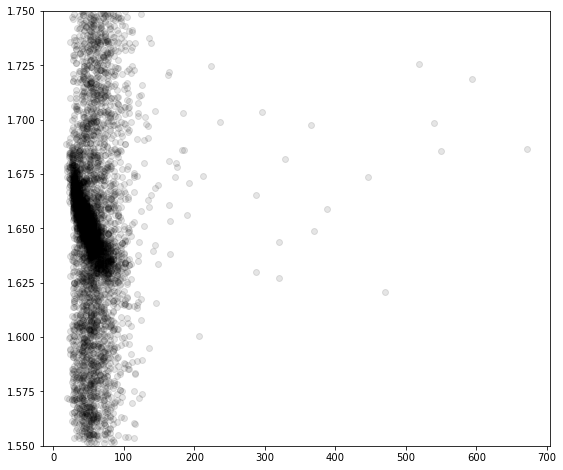

In [108]:
sel     = selections['fidutial.LT']
print(sel.info)

subplot = pltext.canvas(2, 2, 8, 10)

subplot(1)
plt.scatter(df.evt_dz[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylim(ranges['trk_ecells']); plt.xlim(ranges['trk_dz.ds'])
plt.ylabel('Energy of the cells (MeV)'); plt.xlabel('$\Delta z$ (mm)')

subplot(2)
plt.scatter(df.trk_dz[sel], df.trk_ecells[sel], alpha = 0.1);
plt.ylim(ranges['trk_ecells']); plt.xlim(ranges['trk_dz.ds']);
plt.ylabel('Energy of the cells in the track (MeV)'); plt.xlabel('$\Delta z$ (mm)')

**Conclusions**:

   * Delta-z effect is there in DS in Energy ecells
   
   * Delta-z is attenuated with best-track!

### Relation with the isolated cells

**Conclusion:**
    
   * There is a clear correlation between the number and energy of the isolated cells and the dz-track!
   
   * There is a clear correlation between the energy of the track and number and energy of the isolated cells.
   
   * An explanation for the $\Delta z$ effect?
       
       * isolated cells (photo-electric?) is related with the energy of the slice. Short tracks have larger energy in the slices than longer tracks, therefore produce more isolated cells. The energy associated to the isolated tracks if added to the ds-event produces an increase of energy for short track and less increase in energy for longer tracks. Therefore producing the $\Delta-z$ effec.

### Energy of the event removing the isolated hits

In [ ]:
sel     = selections['fidutial']
print(sel.info)

subplot = pltext.canvas(4, 2, 8, 10)

subplot(1)
plt.scatter(df.evt_dz[sel], df.evt_ecells[sel] - df.evt_eisos[sel], alpha = 0.1);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('Energy of event - Energy of isolated cells (MeV)');
plt.xlim(ranges['trk_dz.ds']); plt.ylim(ranges['trk_ecells']);

subplot(2)
plt.scatter(df.trk_dz[sel], df.trk_ecells[sel], alpha = 0.1);
plt.xlabel(r'$\Delta z$ (mm)'); plt.ylabel('sum of the track(MeV)');
plt.xlim(ranges['trk_dz.ds']); plt.ylim(ranges['trk_ecells']);

#subplot(3)
#plt.scatter(df.evt_nisos[sel], df.evt_ecells[sel], alpha = 0.1);
#plt.ylabel('Sum of energy of the cells (MeV)'); plt.xlabel('number of isolated cells');
#plt.xlim(ranges['trk_ecells']); plt.xlim((0., 100.));



In [ ]:
#pltext.hist(df.evt_nisos, 20);
subplot = pltext.canvas(2, 2, 8, 10)

subplot(1)
sel = ut.in_range(df.evt_dz, (0., 140))
plt.scatter(df.evt_nisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylim(range_e)

subplot(2)
sel = ut.in_range(df.evt_eisos, (0., 0.05))
plt.scatter(df.evt_eisos[sel], df.evt_ecells[sel], alpha = 0.1);
plt.ylim(range_e)

In [ ]:
subplot = pltext.canvas(2, 2, 8, 10)

subplot(1)
sel = ut.in_range(df.evt_dz, (0., 100))
plt.scatter(df.evt_dz[sel], df.erec[sel], alpha = 0.1);
plt.ylim(range_e);

subplot(2)
sel = ut.in_range(df.evt_dz, (0., 100))
plt.scatter(df.evt_dz[sel], df.erec[sel] - df.evt_eisos[sel], alpha = 0.1);
plt.ylim(range_e);

In [ ]:
subplot = pltext.canvas(2, 2, 8, 10)

subplot(1)
sel = ut.in_range(df.evt_dz, (0., 100))
plt.scatter(df.evt_dz[sel], df.trk_ecells[sel], alpha = 0.1);
plt.ylim(range_e);

subplot(2)
plt.scatter(df.evt_dz[sel], df.trk_ecells[sel], alpha = 0.1);
plt.ylim(range_e);

In [ ]:
sel_e = ut.in_range(df.erec - df.evt_eisos, range_e)
pltext.hist(df.erec[sel & sel_e] - df.evt_eisos[sel & sel_e], 100);

In [ ]:
ss, _, _   = pltbes.pfit_energy(df.erec[sel & sel_e] - df.evt_eisos[sel & sel_e], 100, formate = '6.4f')
print(ss)

In [ ]:
import bes.pltbes as pltbes

subplot = pltext.canvas(2, 2, 8, 10)
subplot(1)
enes = bes.energy_correction(df.trk_ecells, df.trk_dz, 2.76e-4)
sel  = ut.in_range(enes, range_e)
ss, _, _   = pltbes.pfit_energy(enes[sel], 100, formate = '6.4f')
print(ss)

subplot(2)
enes = bes.energy_correction(df.erec, df.evt_dz)
sel  = ut.in_range(enes, range_e)
ss, _, _   = pltbes.pfit_energy(enes[sel], 100, formate = '6.4f')
print(ss)

In [ ]:
sel = ut.in_range(df.trkene, (1.55, 1.75))
plt.scatter(df.trkdz[sel], df.trkene[sel], alpha = 0.05);
#plt.scatter(df.trkdz[sel], df.etot[sel], alpha = 0.05);

In [ ]:
#-----------------------

In [ ]:

    
    
    # compute isolated tracks
    nran_trk = np.array([np.sum(rangers == kid) for kid in kids])
    #print('nranges in tracks ', nran_trk)
    ksel     = nran_trk == 1
    #print(ksel)
    nisos    = np.sum(ksel)  # number of isolated ranges
    eisos    = np.sum(enes[ksel]) # energy of the isolated ranges
    
    # range of the event
    zmin     = np.min(z[sel])
    zmax     = np.max(z[sel])
    rmax     = np.max(np.sqrt(x[sel]*x[sel] + y[sel]*y[sel]))

    def _track(kid):
        
        sel      = rangers == kid

        trk_ene  = np.sum(erangers[sel])
        trk_ncells   = np.sum
        trk_nrangers = TODO
        trk_nout = np.sum(cout[sel] == True)
        trk_esumnodes = np.sum(enode[sel])
        
        trk_zmin = np.min(z[sel])
        trk_zmax = np.max(z[sel])
        trk_dz    = trk_zmax - trk_zmin
        trk_rmax = np.max(np.sqrt(x[sel]*x[sel] + y[sel]*y[sel]))
        
        xenodes     = np.sort(enodes[sel])        
        trk_enode1  = xenodes[-1]
        trk_enode2  = xenodes[-2] if (len(xenodes) >= 2) else 0.
        
        #xenodes    = np.sort(erangers[sel_trk])        
        #trk_eran1  = xenodes[-1]
        #trk_eran2  = xenodes[-2] if (xenodes >= 2) else 0.
        
        return trk_ene, trk_dz, trk_zmin, trk_zmax, trk_rmax, trk_enode1, trk_enode2
        

    track_vars = _track(kids[0]) 
    
    return (etot, nran, zmin, zmax, rmax, ntrk, nisos, eisos, *track_vars)

In [ ]:
def get_chits_filename(run_number, label = 'ds_rough'):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/chits_{label}_{run_number}.h5'
    return filename


In [ ]:
run_number = 8182
fname = get_chits_filename(run_number)
print(fname)
ddh    = pd.read_hdf(fname, 'CHITs.lowTh')
dde    = ddh.groupby('event')
events = np.unique(ddh.event.values)
print('total events ', len(events))

In [ ]:
ddh

In [ ]:
def draw_event(event = None):
    event = np.random.choice(events, 1)[0] if event is None else event
    print('event ', event)
    hh    = dde.get_group(event)
    x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
    #x, y, z, eraw = hits(hh, 'E')
    
    nplay.event(x, y, z, erec, alpha = 0.2, cmap = 'jet');
    #nplay.wf(x, y, z, erec, cmap = 'jet');
    #nplay.wf(x, y, z, eraw, cmap = 'jet');
    #nplay.wfcalib(x, y, z, erec, eraw, cmap = 'jet')
    

## Load Event

In [ ]:
xevents = [1241463, 981141, 2300475, 543247]
#xevents = [1002903, 928609, 1057115, 226373]
#xevents = 1883117, 1368698 # one-electron
#xevents = 2617619 # multiple-connections!
#xevents = 1477362 # double-electrons
#xevents = 2141627 # problem with the link! ISSUE
# event_track   = 872975, 1855276, 2017780
# events_2e     =  313053,  1306119, 2108616
# events_1e     =  2451063
# event_loops   =  285947
# event_brokend = 39402
#event_satelites = [285627, 2141627]

xevents = np.unique(ddh.event.values)
event   = np.random.choice(xevents, 1)[0]
#event   = 1645993, 1807203, 756596, 39402 # A nice track
draw_event(event)

## Load the event

In [ ]:
#event = 543247
hh    = dde.get_group(event)
x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
xstep, ystep, zstep = 10., 10., 2.

## Run clouds

In [ ]:
ndim    = 3
coors   = (x, y, z)
steps   = (xstep, ystep, zstep)
weights = eraw

dfclouds = clouds.clouds(coors, steps, weights)
#dfclouds

## Draw clouds

In [ ]:
pltclouds.dcloud_steps(dfclouds, ndim, scale = 0.004, xaxis = 2)

In [ ]:
pltclouds.dcloud_steps_tracks(dfclouds, ndim, scale = 0.004, xaxis = 2)

In [ ]:
if (ndim == 3):
    pltclouds.dcloud_tracks_3dviews(dfclouds, scale = 0.004, type = 'ranger')